<a href="https://colab.research.google.com/github/moonwalker199/creditcard-default-prediction/blob/main/creditcard_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, RocCurveDisplay,
    fbeta_score, accuracy_score, recall_score, precision_score, f1_score, make_scorer
)

from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.under_sampling import TomekLinks

from catboost import CatBoostClassifier

In [ ]:
df= pd.read_csv('train_dataset_final1.csv')

In [ ]:
df.shape

(25247, 27)

In [ ]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
df.tail()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0
25246,30263,1,1,2,160000,58.0,-1,-1,-1,-1,...,1443.08,1442.81,1443.06,1442.97,1443.31,1442.72,1443.00,1443.00,1.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [ ]:
df.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [ ]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,126
pay_0,0
pay_2,0
pay_3,0
pay_4,0


Clearly, only the "age" column has missing values which are handled below using Imputation

In [ ]:

!pip install -q fancyimpute

from fancyimpute import IterativeImputer


column_to_impute = 'age'


mice_imputer = IterativeImputer(max_iter=10, random_state=0)

df_age = df[[column_to_impute]]


df[column_to_impute] = mice_imputer.fit_transform(df_age)

# Verify if missing values have been imputed
print(df.isnull().sum())

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.4 MB/s eta 0:00:00
Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64


In [ ]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

near_constant_features = [col for col in df.columns if df[col].nunique() < len(df) * 0.01 and df[col].nunique() > 1]
print("Near constant features:", near_constant_features)

Constant features: []
Near constant features: ['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'next_month_default']


In [ ]:
df.nunique()

,0
Customer_ID,25247
marriage,4
sex,2
education,7
LIMIT_BAL,80
age,57
pay_0,11
pay_2,11
pay_3,11
pay_4,10


Clearly, some fields have more unique values than the given description, we will be handling them below.

In [ ]:
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,273
0,53


Since we are not given the definition of 'marriage'=0, combining this with `Others(3)` category.

In [ ]:
df["marriage"] = df["marriage"].replace({0:3})
df['marriage'].value_counts()

,count
marriage,
2,13441
1,11480
3,326


In [ ]:
df["education"].value_counts()

,count
education,
2,11717
1,8988
3,4115
5,253
4,116
6,44
0,14


Similary, for education, no defintion was given for values 0,5,6. <br>
Hence, combining this with `'others'`(4) category.

In [ ]:
df["education"] = df["education"].replace({0:4,5:4,6:4})
df["education"].value_counts()

,count
education,
2,11717
1,8988
3,4115
4,427


In [ ]:
df['sex'].value_counts()

,count
sex,
1,15252
0,9995


With missing and duplicate entries addressed and the dataset being now clean, pre-processed and consistent, it's ready for in-depth exploratory analysis.

#**Exploratory Data Analysis**

Target Variable Distribbution--Significant Imbalance detected from the plot below 👇🏼

next_month_default
0    20440
1     4807
Name: count, dtype: int64


Text(0.5, 1.0, 'Target Distribution (0 = No Default, 1 = Default)')

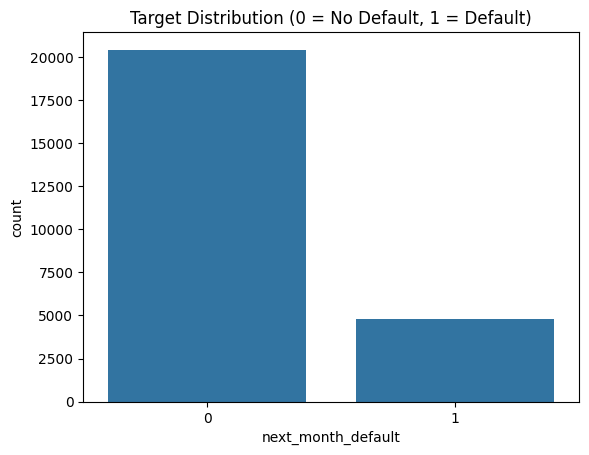

In [ ]:
print(df['next_month_default'].value_counts())
sns.countplot(x='next_month_default', data=df)
plt.title('Target Distribution (0 = No Default, 1 = Default)')

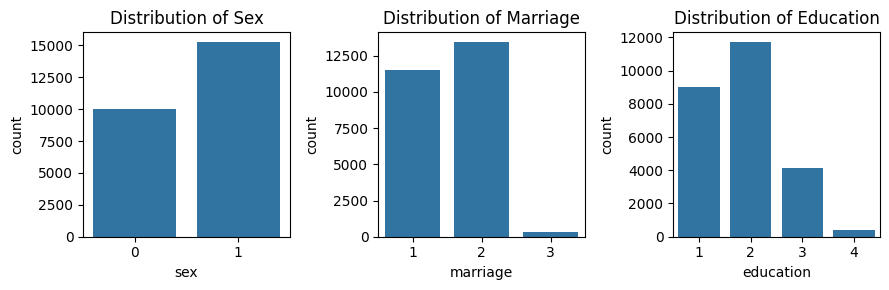

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
sns.countplot(x='sex', data=df, ax=axes[0])
axes[0].set_title('Distribution of Sex')
sns.countplot(x='marriage', data=df, ax=axes[1])
axes[1].set_title('Distribution of Marriage')
sns.countplot(x='education', data=df, ax=axes[2])
axes[2].set_title('Distribution of Education')
plt.tight_layout()
plt.show()

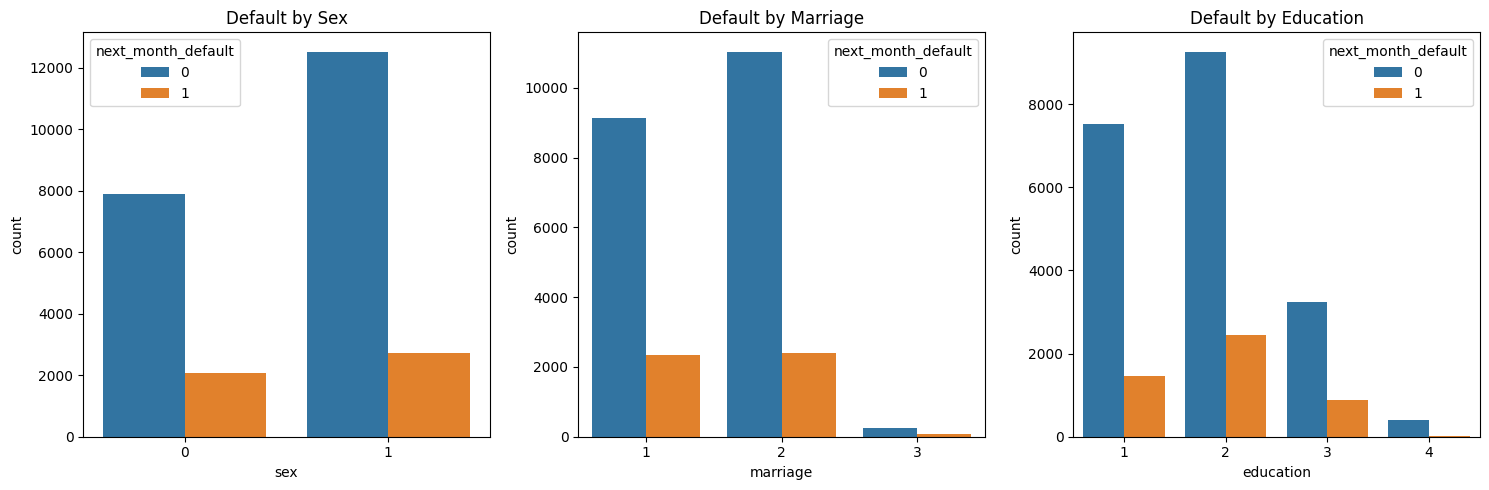

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='sex', hue='next_month_default', data=df, ax=axes[0])
axes[0].set_title('Default by Sex')

sns.countplot(x='marriage', hue='next_month_default', data=df, ax=axes[1])
axes[1].set_title('Default by Marriage')

sns.countplot(x='education', hue='next_month_default', data=df, ax=axes[2])
axes[2].set_title('Default by Education')

plt.tight_layout()
plt.show()

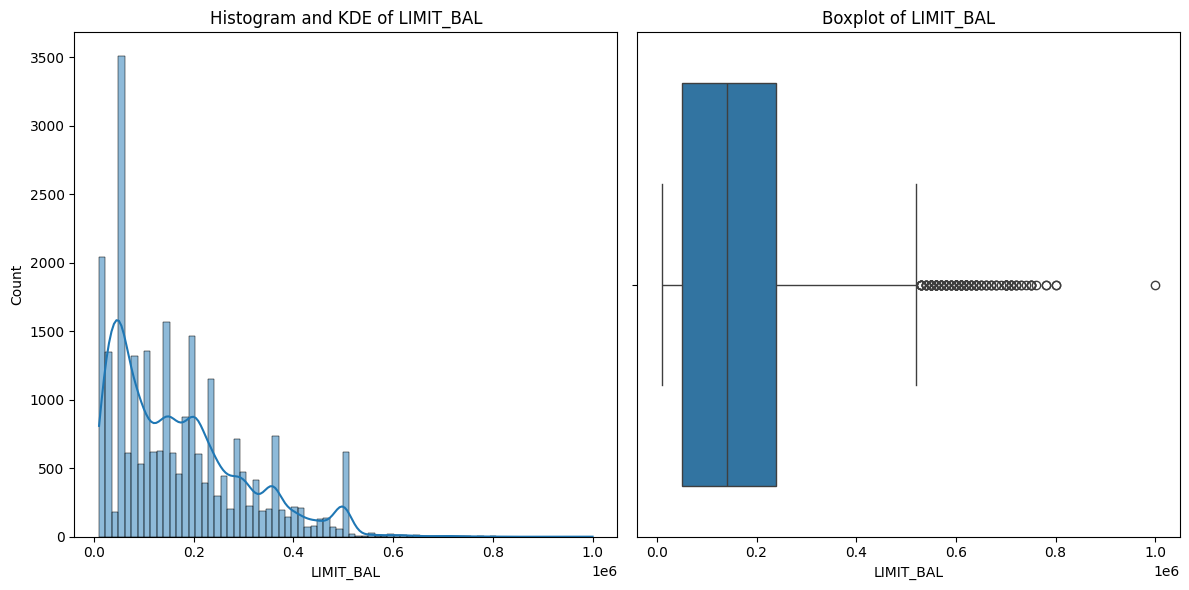

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Histogram and KDE of LIMIT_BAL')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['LIMIT_BAL'])
plt.title('Boxplot of LIMIT_BAL')
plt.tight_layout()
plt.show()

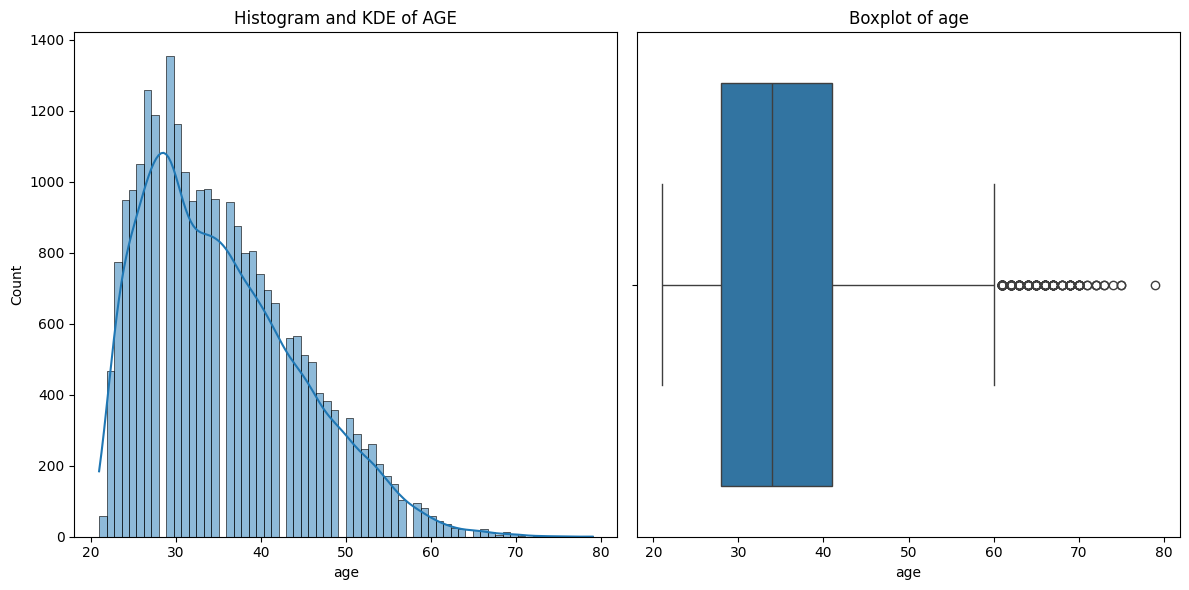

In [ ]:


plt.figure(figsize=(12, 6))

# Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Histogram and KDE of AGE')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')

plt.tight_layout()
plt.show()

age missing values down


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
marriage,0
sex,0
education,0
LIMIT_BAL,0
age,0
pay_0,0
pay_2,0
pay_3,0
pay_4,0


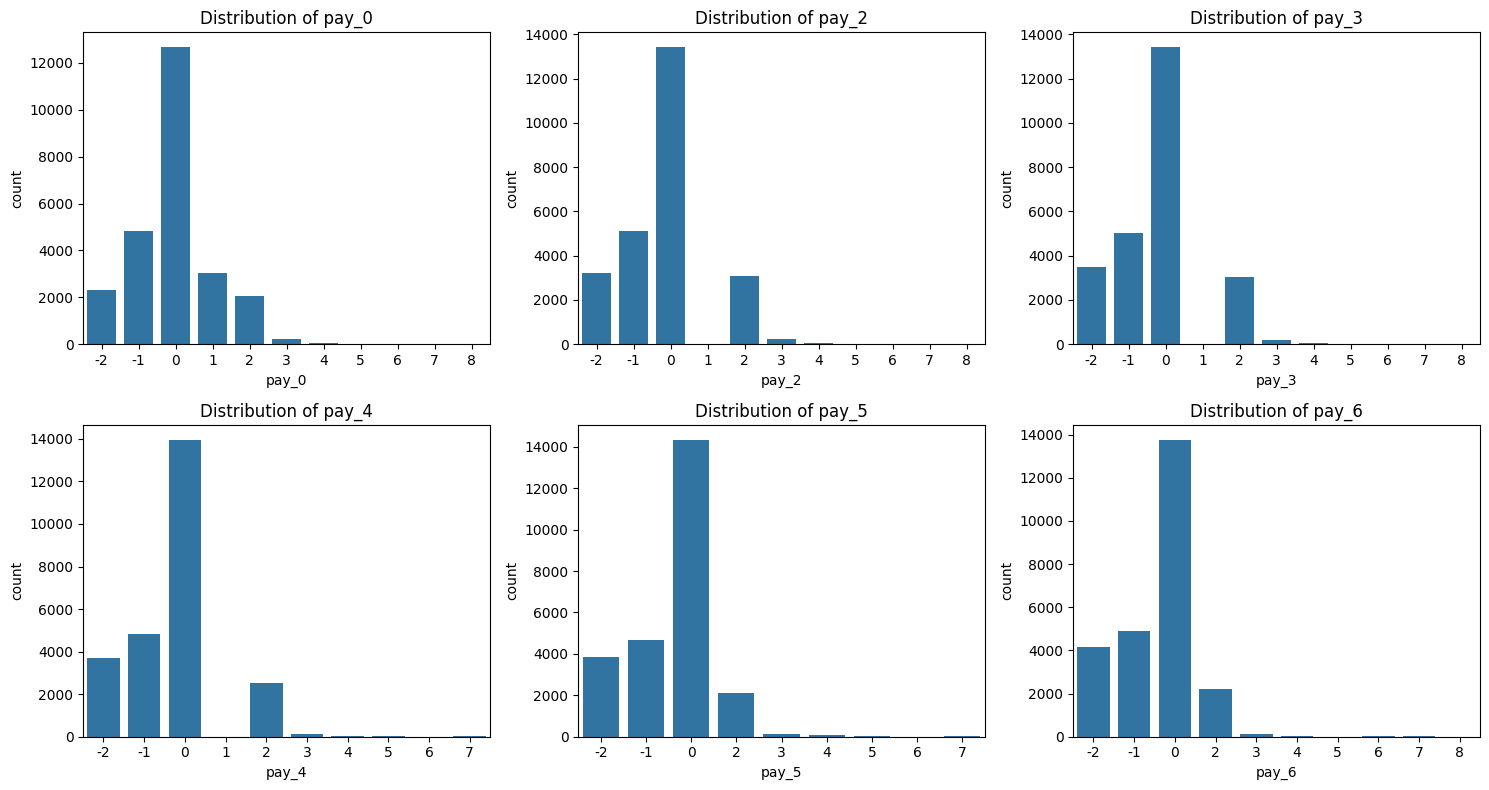

In [ ]:


pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

n_cols = 3
n_rows = (len(pay_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(pay_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

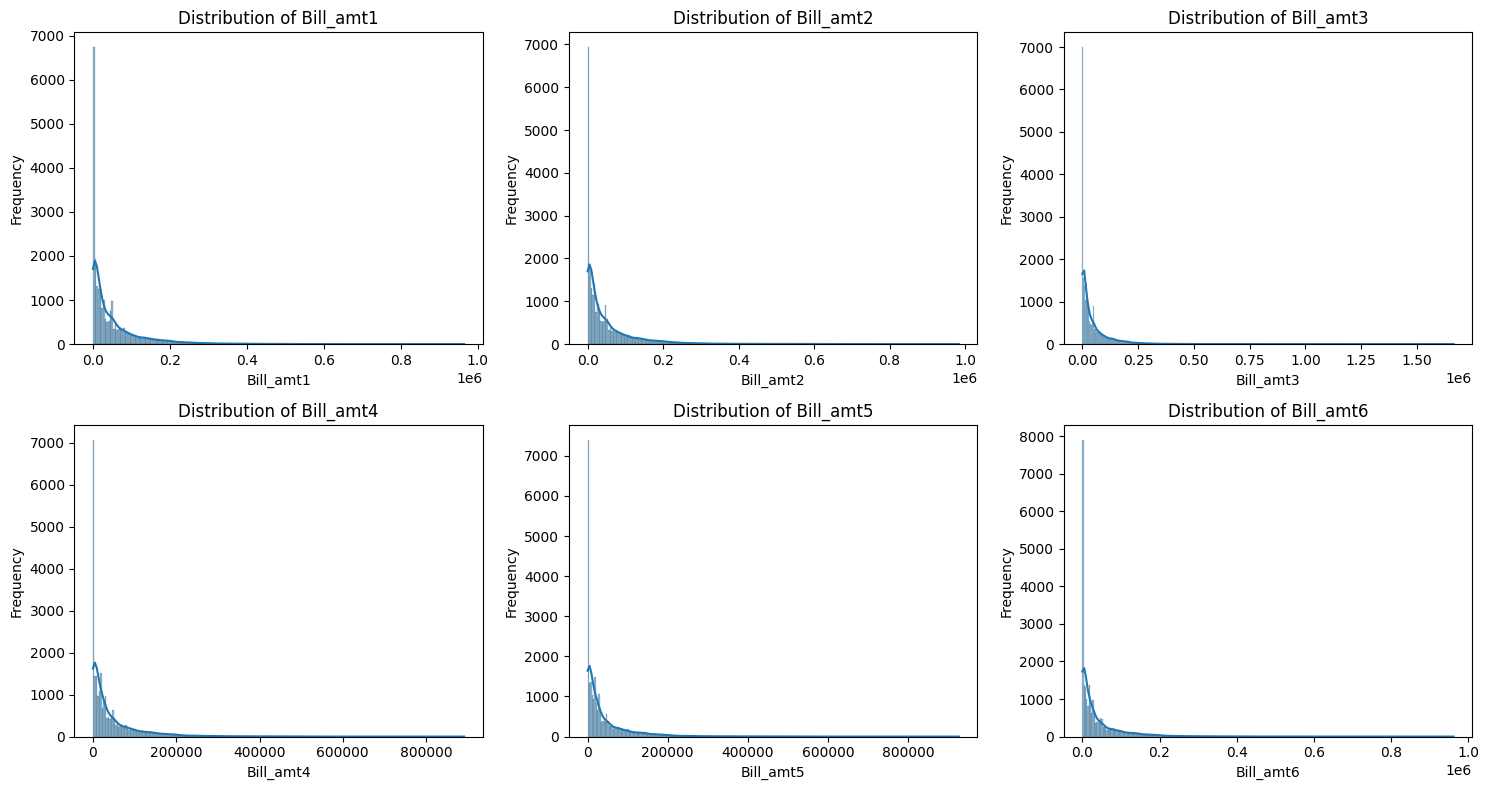

In [ ]:

bill_amt_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']

n_cols = 3
n_rows = (len(bill_amt_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(bill_amt_cols):
    # For Bill_amt, a countplot isn't suitable as they are continuous or have many unique values.
    # A distribution plot like histplot or kdeplot is better. Let's use histplot.
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

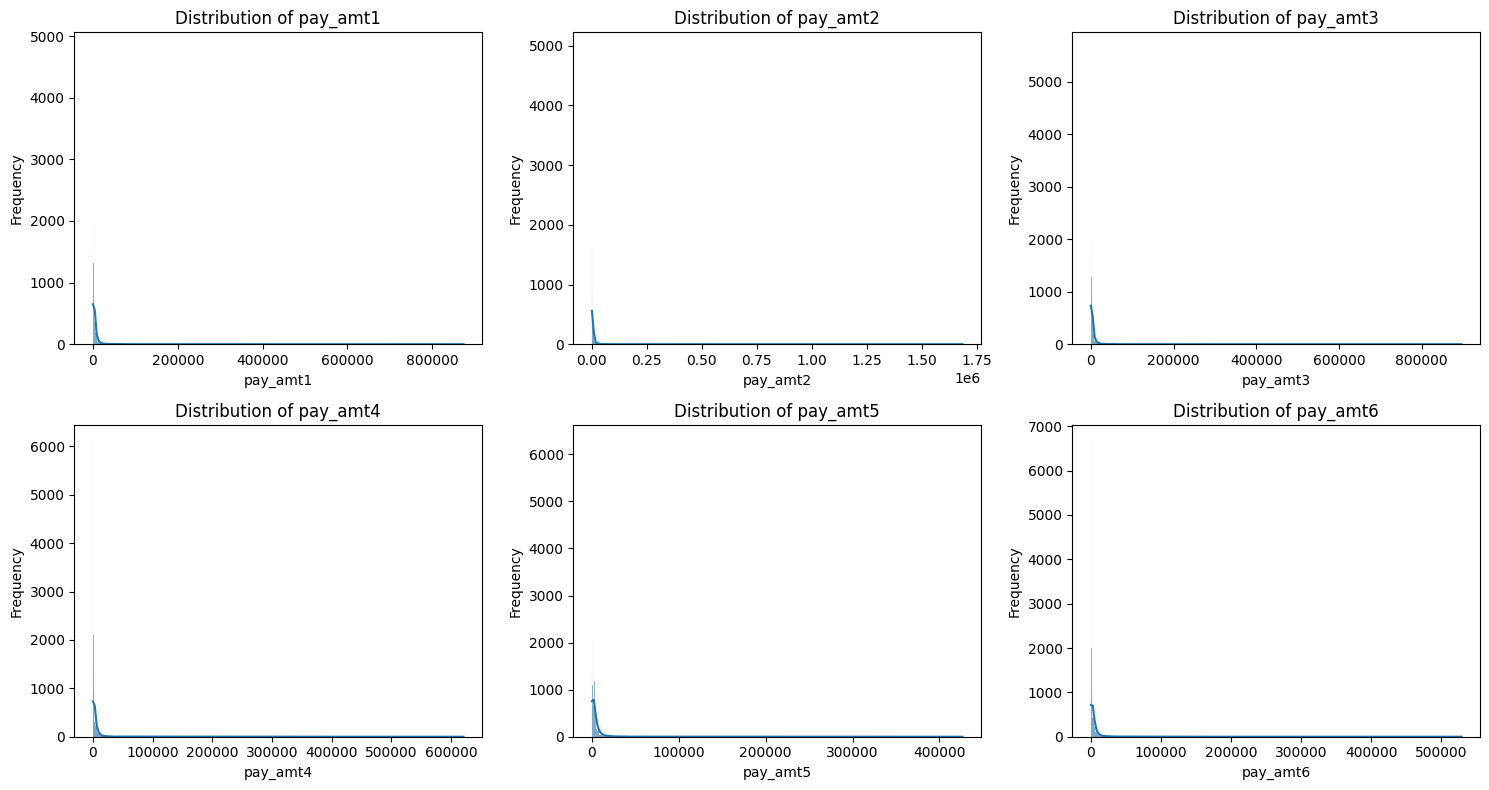

In [ ]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

n_cols = 3
n_rows = (len(pay_amt_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(pay_amt_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

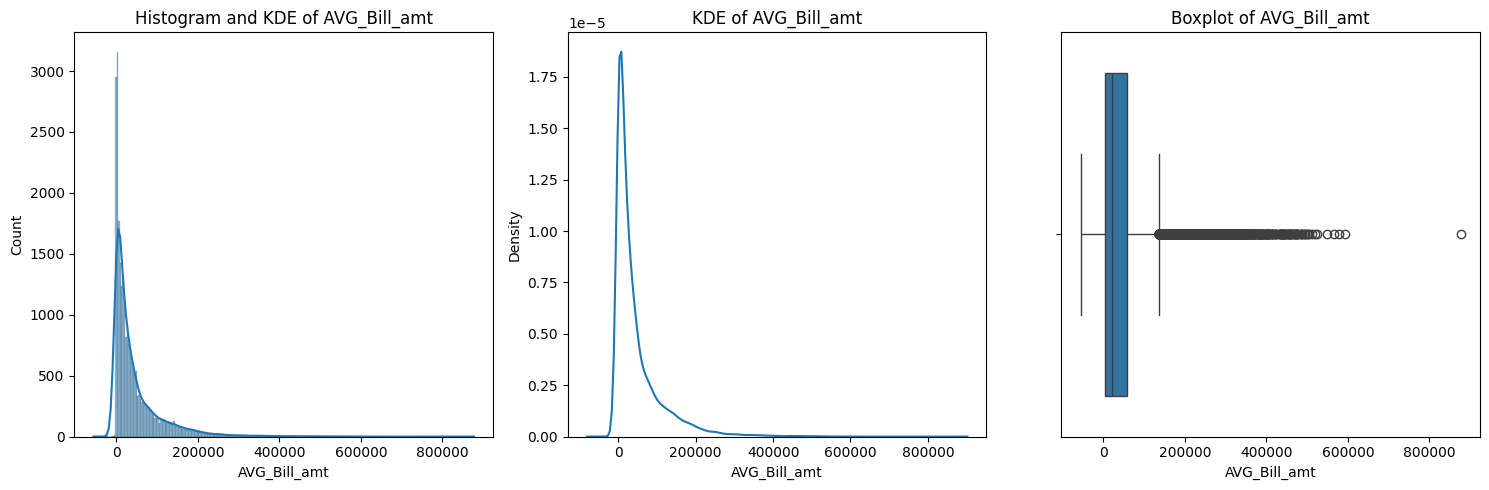

In [ ]:

# Analyze AVG_Bill_amt
plt.figure(figsize=(15, 5))

# Histogram and KDE
plt.subplot(1, 3, 1)
sns.histplot(df['AVG_Bill_amt'], kde=True)
plt.title('Histogram and KDE of AVG_Bill_amt')

# KDE
plt.subplot(1, 3, 2)
sns.kdeplot(df['AVG_Bill_amt'])
plt.title('KDE of AVG_Bill_amt')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['AVG_Bill_amt'])
plt.title('Boxplot of AVG_Bill_amt')

plt.tight_layout()
plt.show()

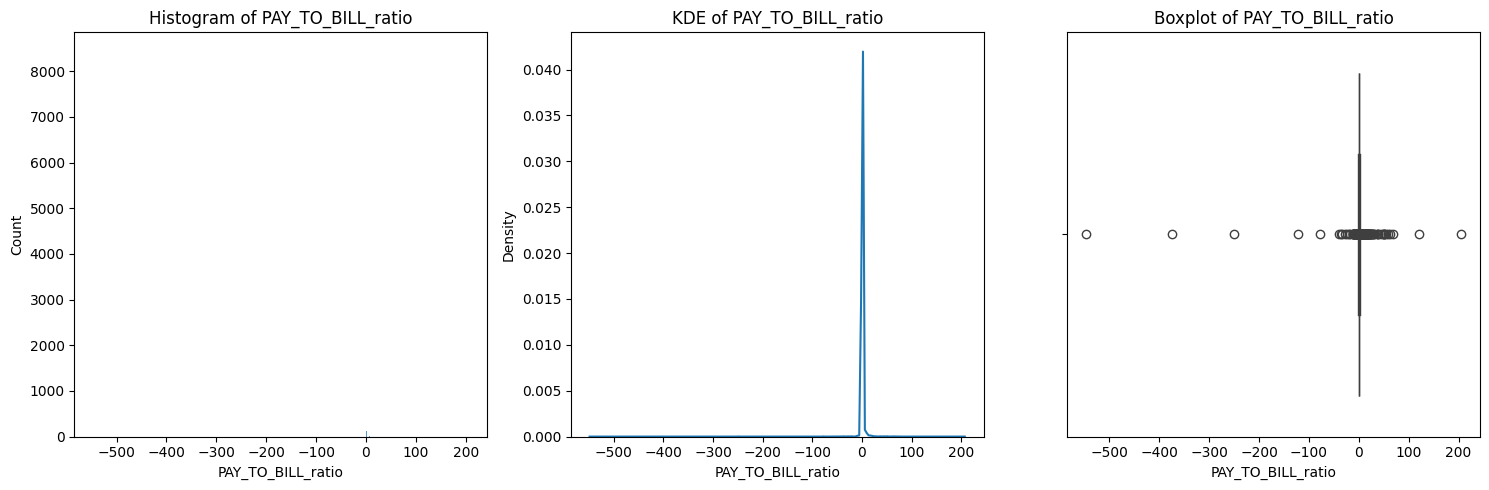

In [ ]:

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df['PAY_TO_BILL_ratio'], kde=False)
plt.title('Histogram of PAY_TO_BILL_ratio')

# KDE
plt.subplot(1, 3, 2)
sns.kdeplot(df['PAY_TO_BILL_ratio'])
plt.title('KDE of PAY_TO_BILL_ratio')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=df['PAY_TO_BILL_ratio'])
plt.title('Boxplot of PAY_TO_BILL_ratio')

plt.tight_layout()
plt.show()

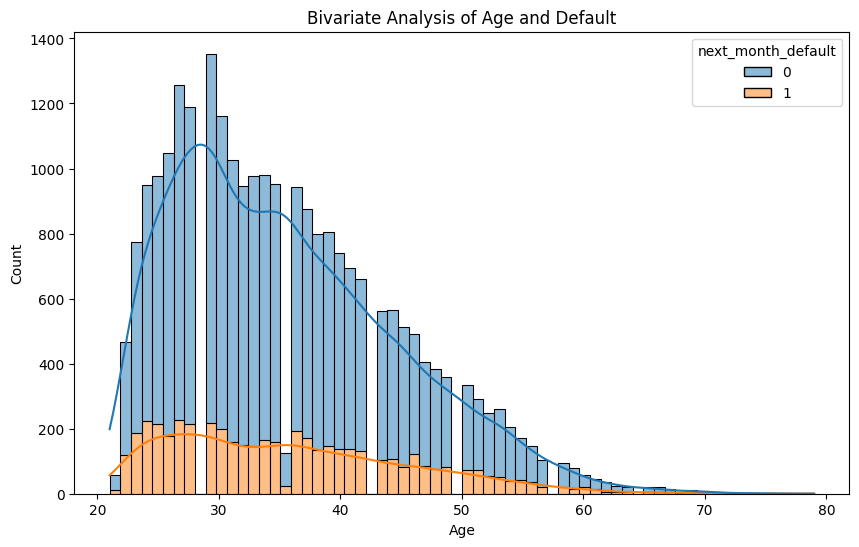

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='next_month_default', multiple='stack', kde=True)
plt.title('Bivariate Analysis of Age and Default')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

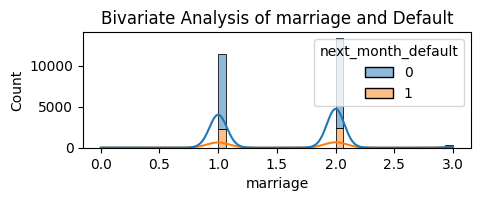

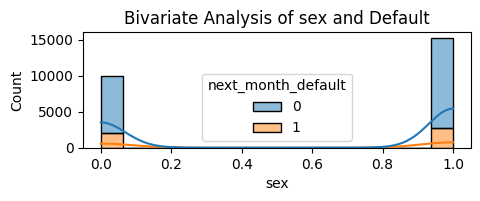

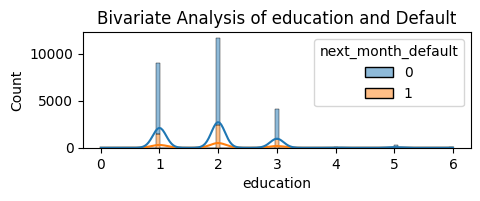

In [ ]:
plt.figure(figsize=(5, 1.5))
sns.histplot(data=df, x='marriage', hue='next_month_default', multiple='stack', kde=True)
plt.title('Bivariate Analysis of marriage and Default')
plt.xlabel('marriage')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(5, 1.5))
sns.histplot(data=df, x='sex', hue='next_month_default', multiple='stack', kde=True)
plt.title('Bivariate Analysis of sex and Default')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(5, 1.5))
sns.histplot(data=df, x='education', hue='next_month_default', multiple='stack', kde=True)
plt.title('Bivariate Analysis of education and Default')
plt.xlabel('education')
plt.ylabel('Count')
plt.show()

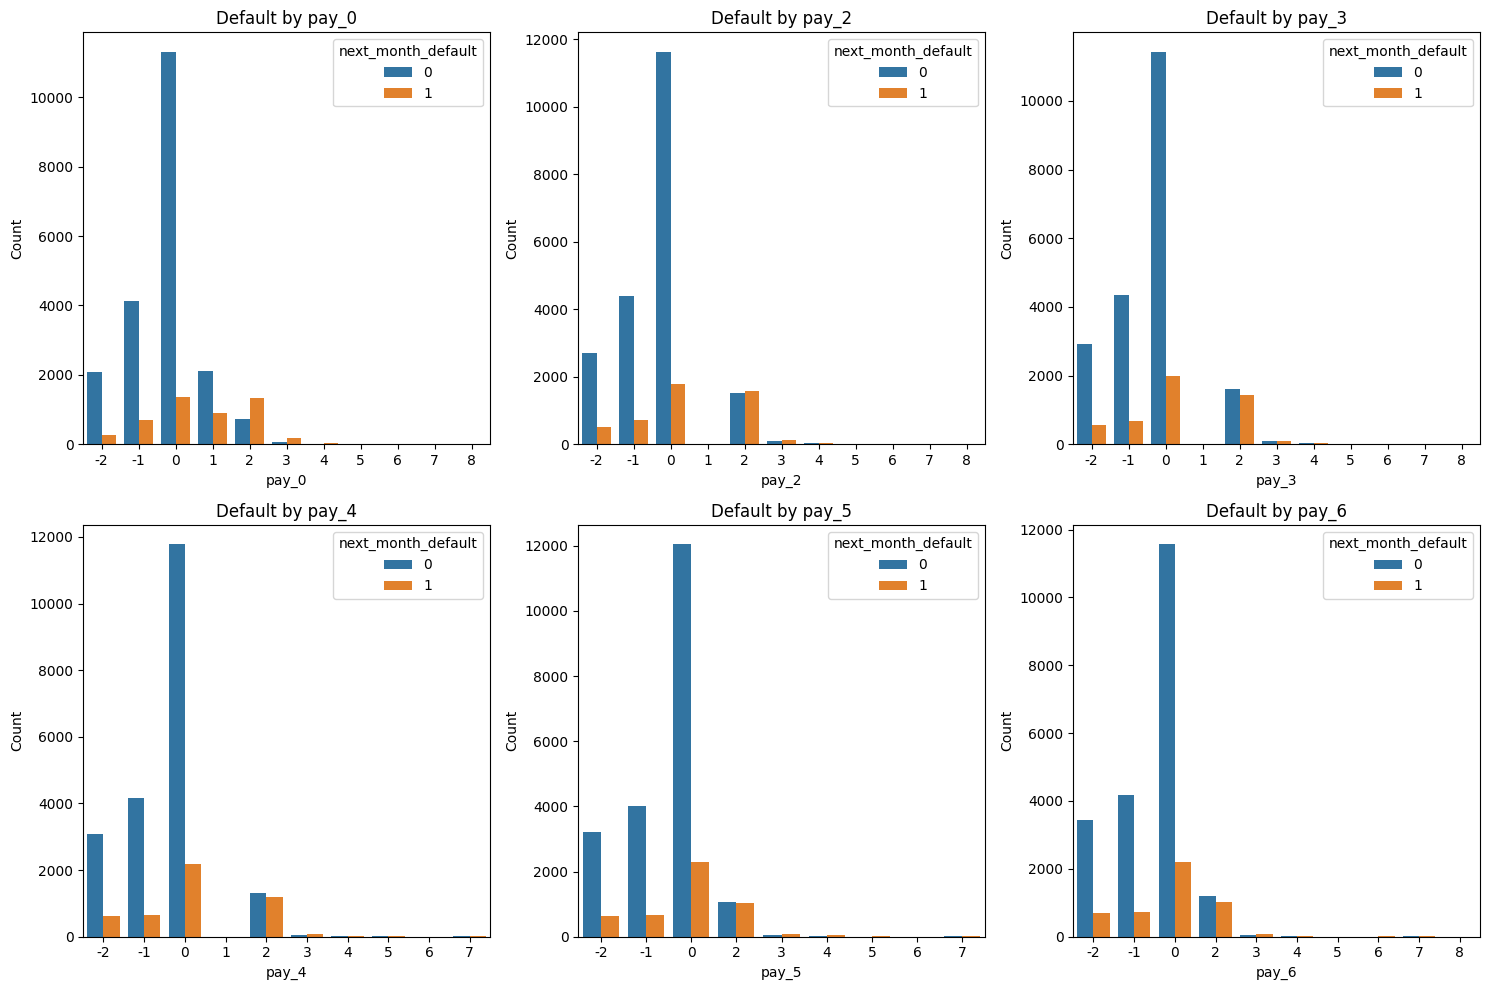

In [ ]:


pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

n_cols = 3
n_rows = (len(pay_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(pay_cols):
    sns.countplot(x=col, hue='next_month_default', data=df, ax=axes[i])
    axes[i].set_title(f'Default by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


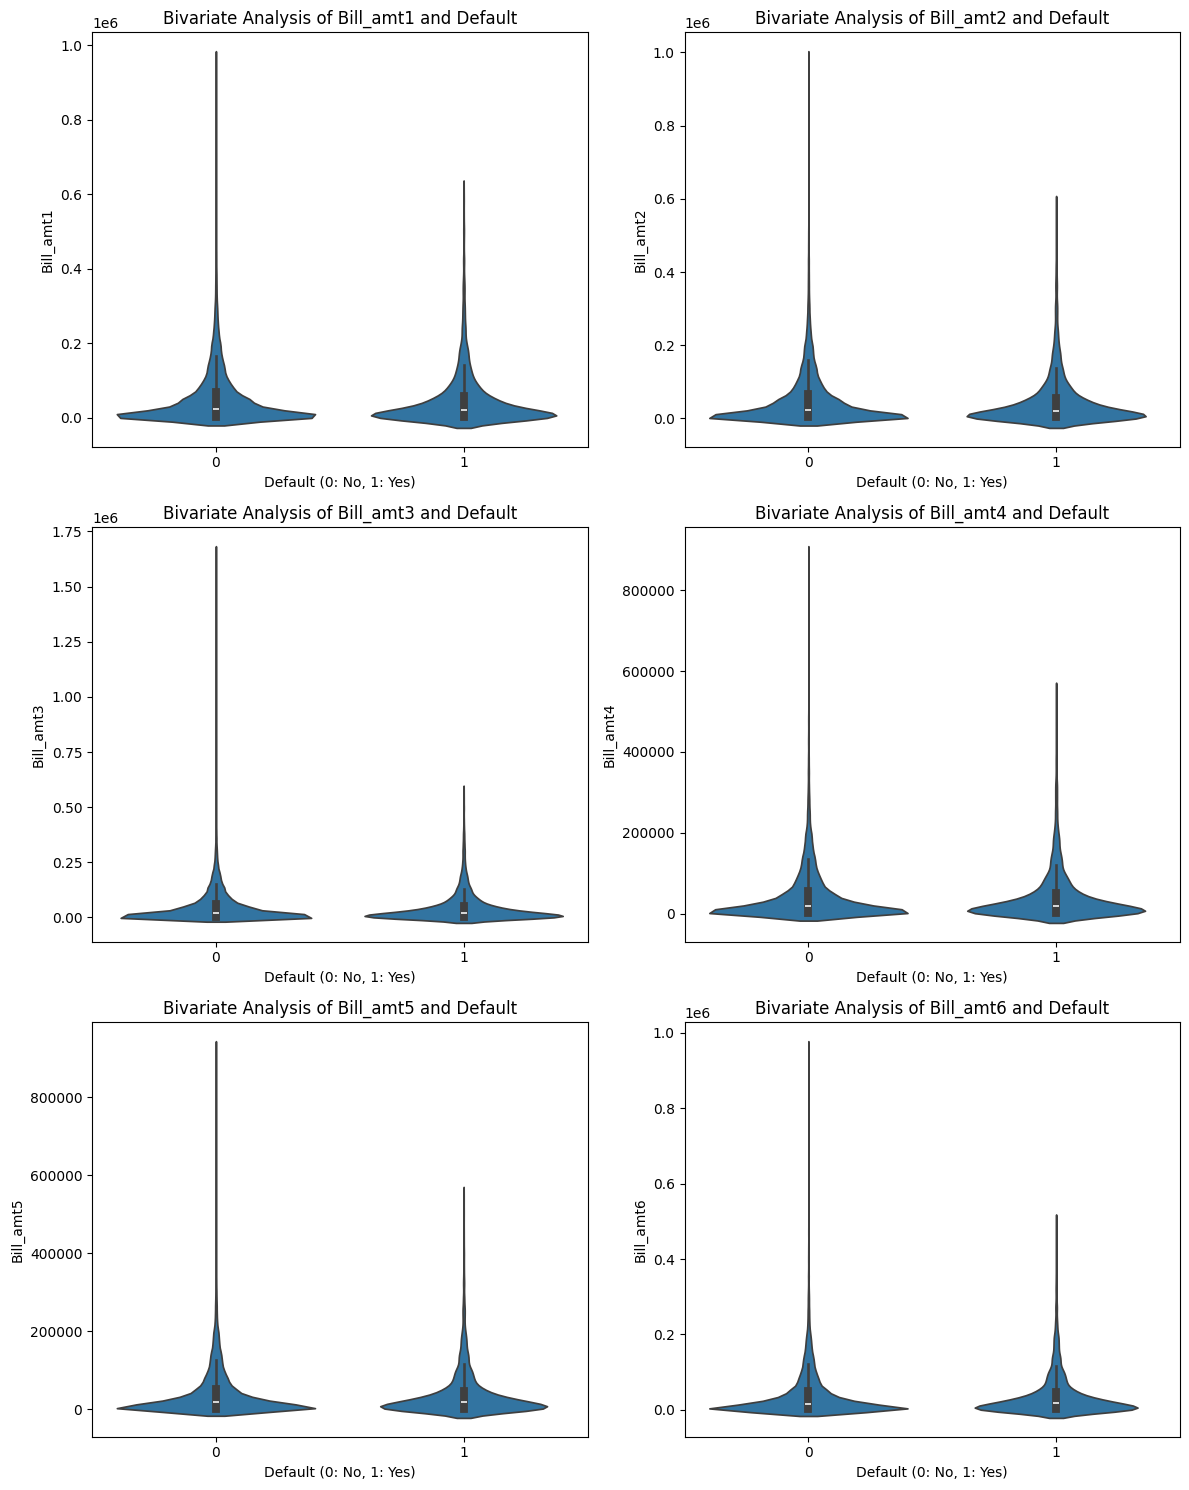

In [ ]:


bill_amt_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']

n_cols = 2 # Number of columns for the plots
n_rows = (len(bill_amt_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(bill_amt_cols):
    # Use violinplot or boxplot for numerical vs categorical
    sns.violinplot(x='next_month_default', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of {col} and Default')
    axes[i].set_xlabel('Default (0: No, 1: Yes)')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

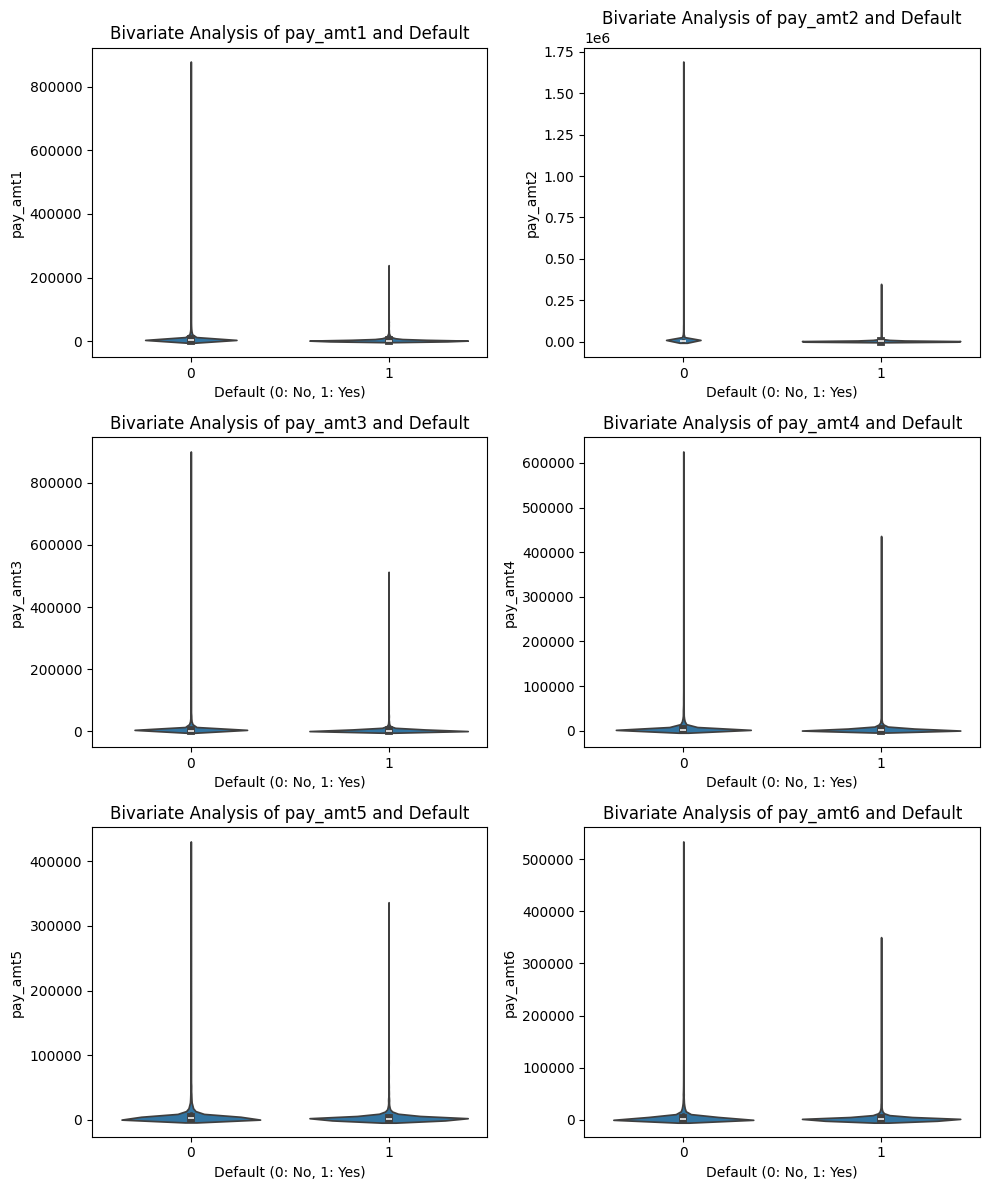

In [ ]:

pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

n_cols = 2 # Number of columns for the plots
n_rows = (len(pay_amt_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4)) # Decreased figsize
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(pay_amt_cols):
    # Use violinplot or boxplot for numerical vs categorical
    sns.violinplot(x='next_month_default', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of {col} and Default')
    axes[i].set_xlabel('Default (0: No, 1: Yes)')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

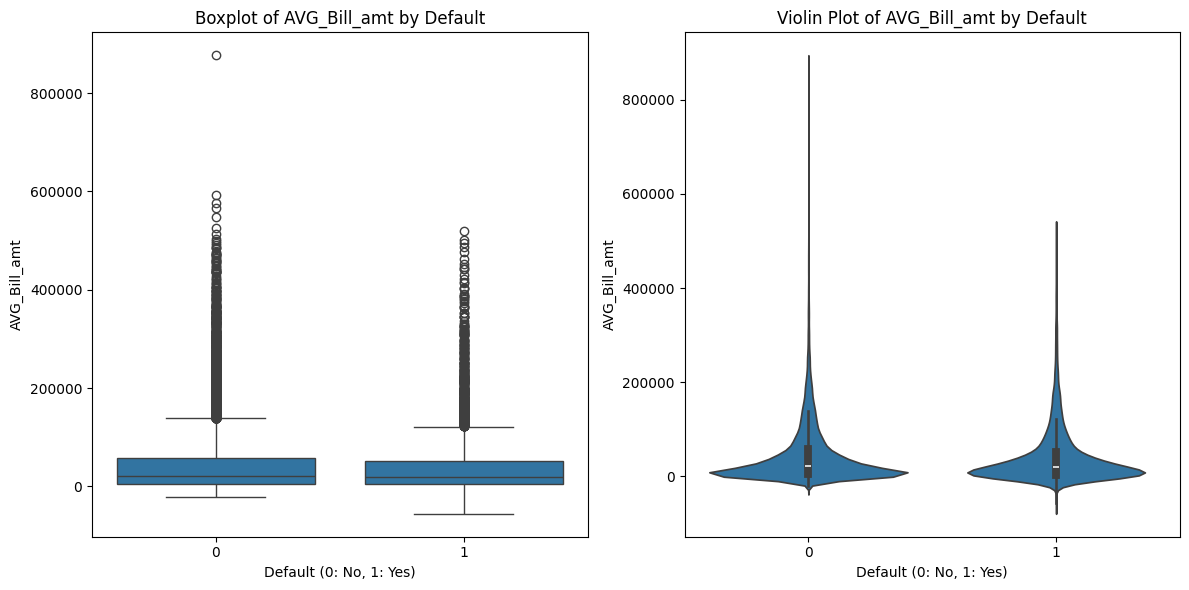

In [ ]:

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='next_month_default', y='AVG_Bill_amt', data=df)
plt.title('Boxplot of AVG_Bill_amt by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('AVG_Bill_amt')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='next_month_default', y='AVG_Bill_amt', data=df)
plt.title('Violin Plot of AVG_Bill_amt by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('AVG_Bill_amt')

plt.tight_layout()
plt.show()

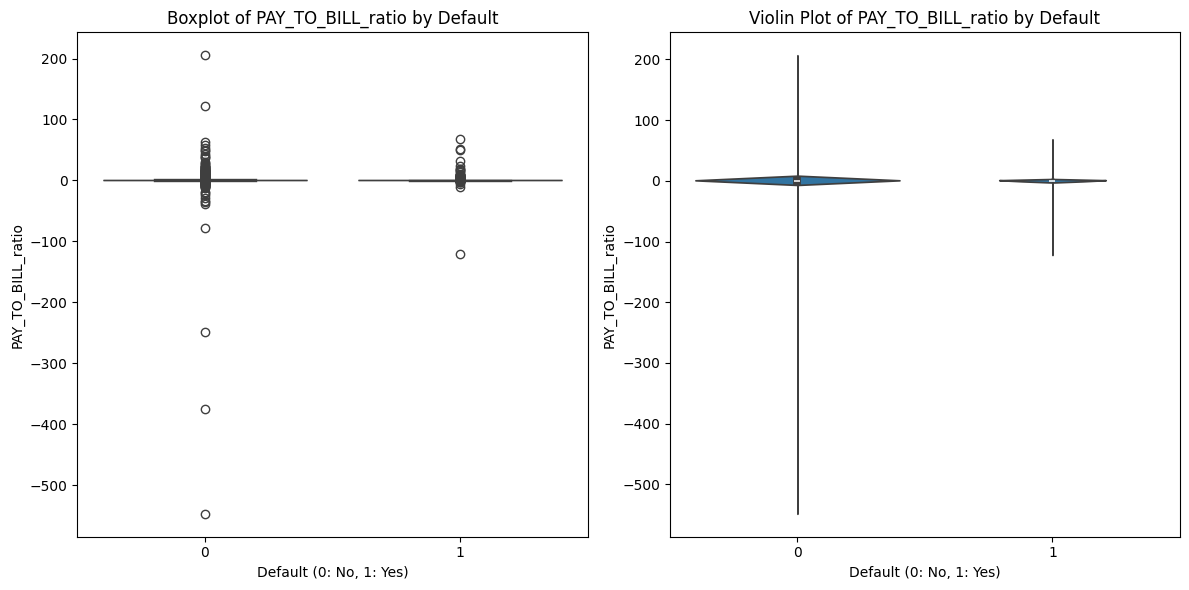

In [ ]:

plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df)
plt.title('Boxplot of PAY_TO_BILL_ratio by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('PAY_TO_BILL_ratio')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df)
plt.title('Violin Plot of PAY_TO_BILL_ratio by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('PAY_TO_BILL_ratio')

plt.tight_layout()
plt.show()

Adding new features


<ipython-input-7-3451353399>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_util['utilization_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-7-3451353399>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

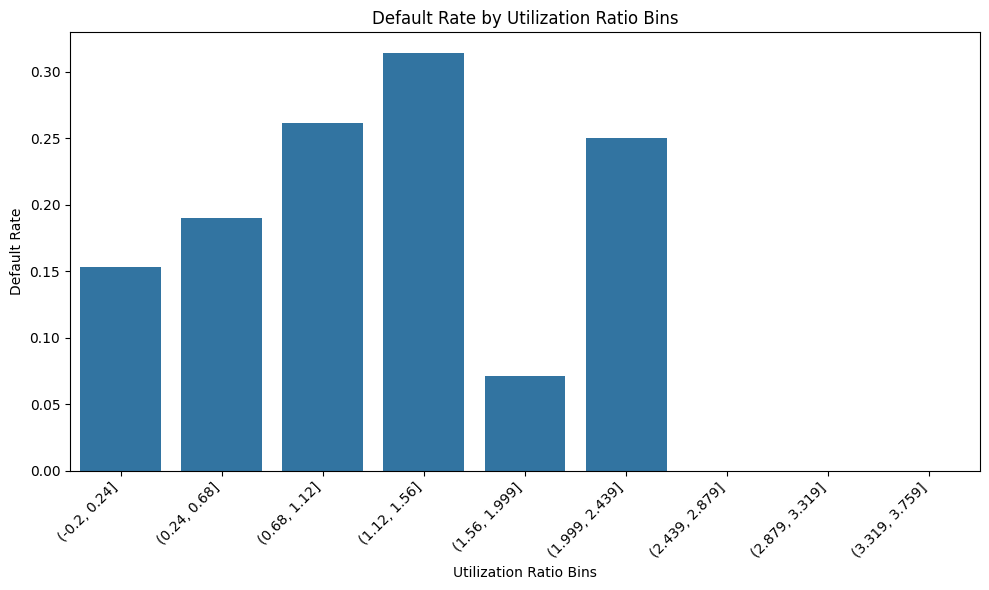

In [ ]:
df_util = df.copy(deep=True)


# Calculate utilization ratio
df_util['utilization_ratio'] = df_util['AVG_Bill_amt'] / df_util['LIMIT_BAL']

# Handle potential division by zero or inf values
df_util['utilization_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_util['utilization_ratio'].fillna(0, inplace=True)  # Or any other imputation method

# Create bins for utilization ratio
bins = np.linspace(df_util['utilization_ratio'].min(), df_util['utilization_ratio'].max(), 10)
df_util['utilization_ratio_bin'] = pd.cut(df_util['utilization_ratio'], bins)

# Calculate default rate per bin
default_rate_by_util_bin = df_util.groupby('utilization_ratio_bin')['next_month_default'].mean().reset_index()

# Plot binned barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='utilization_ratio_bin', y='next_month_default', data=default_rate_by_util_bin)
plt.title('Default Rate by Utilization Ratio Bins')
plt.xlabel('Utilization Ratio Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


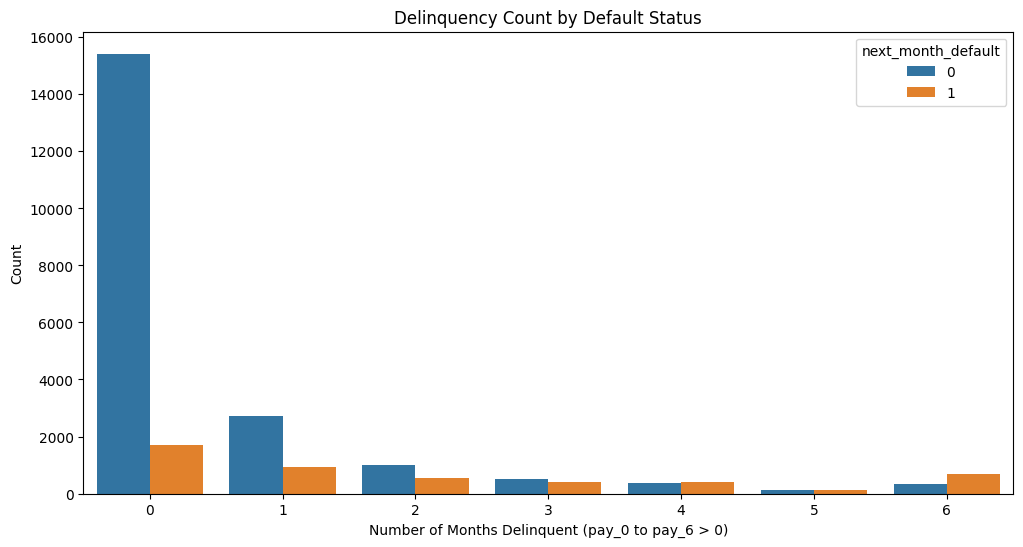

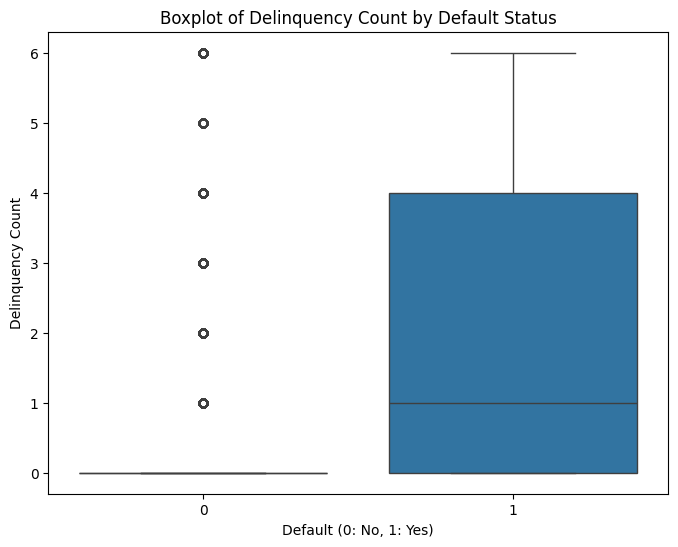

In [ ]:

df_util['delinquency_count'] = df[pay_cols].apply(lambda row: (row > 0).sum(), axis=1)


plt.figure(figsize=(12, 6))
sns.countplot(x='delinquency_count', hue='next_month_default', data=df_util)
plt.title('Delinquency Count by Default Status')
plt.xlabel('Number of Months Delinquent (pay_0 to pay_6 > 0)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='next_month_default', y='delinquency_count', data=df_util)
plt.title('Boxplot of Delinquency Count by Default Status')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Delinquency Count')
plt.show()

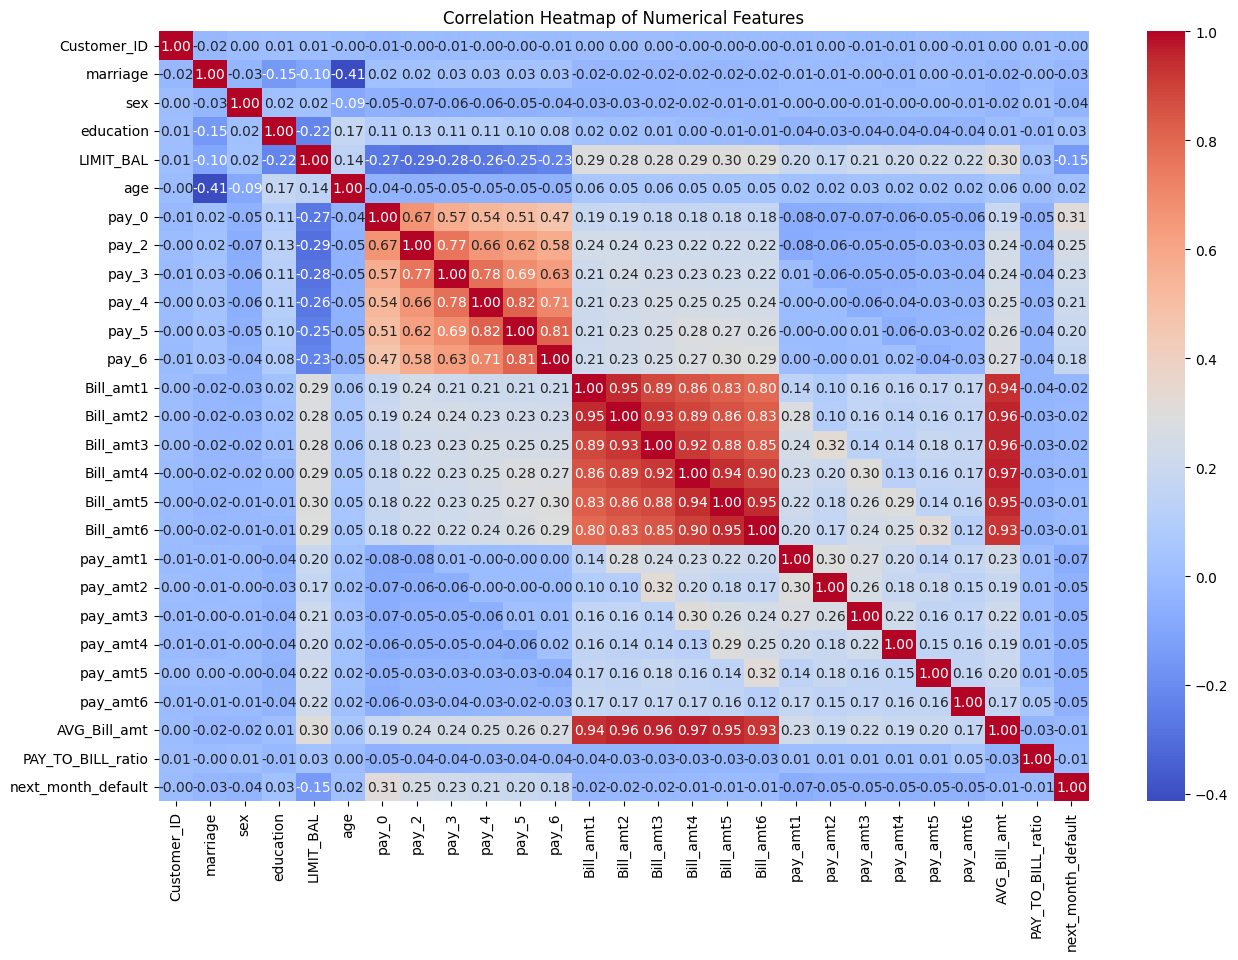

In [ ]:

df_numeric = df.select_dtypes(include=np.number)

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

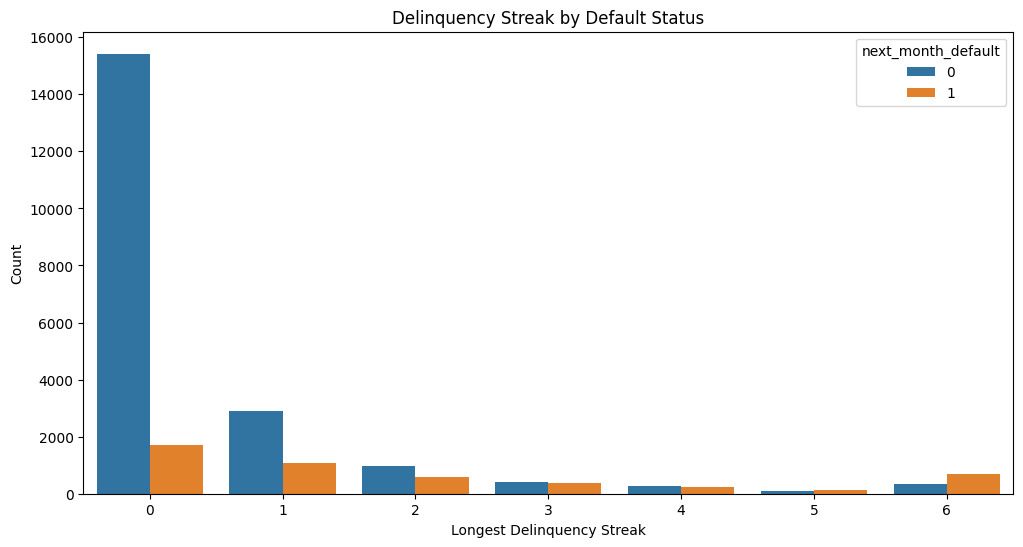

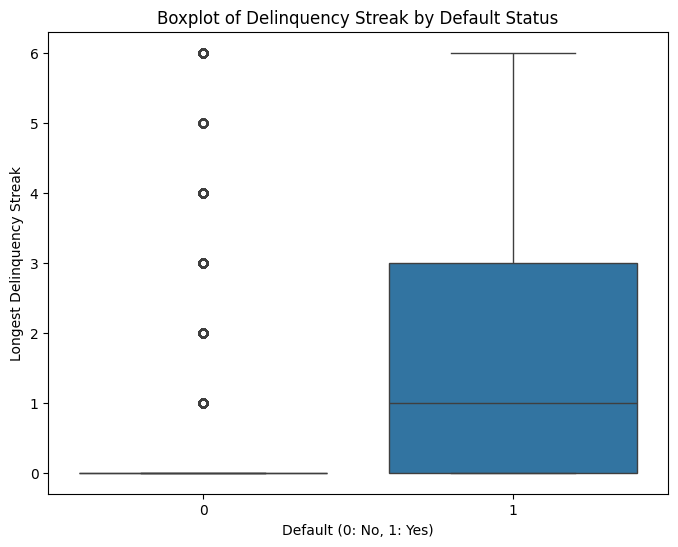

In [ ]:


def calculate_delinquency_streak(df_util):

  pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
  df_streak = df_util[pay_cols]


  df_streak = (df_streak > 0).astype(int)

  def longest_streak(row):
    streak = 0
    max_streak = 0
    for status in row:
      if status == 1:
        streak += 1
      else:
        max_streak = max(max_streak, streak)
        streak = 0
    return max(max_streak, streak)
  return df_streak.apply(longest_streak, axis=1)


df_util['delinquency_streak'] = calculate_delinquency_streak(df_util)


plt.figure(figsize=(12, 6))
sns.countplot(x='delinquency_streak', hue='next_month_default', data=df_util)
plt.title('Delinquency Streak by Default Status')
plt.xlabel('Longest Delinquency Streak')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='next_month_default', y='delinquency_streak', data=df_util)
plt.title('Boxplot of Delinquency Streak by Default Status')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Longest Delinquency Streak')
plt.show()


<ipython-input-79-2971718390>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_util['bill_to_pay_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-79-2971718390>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

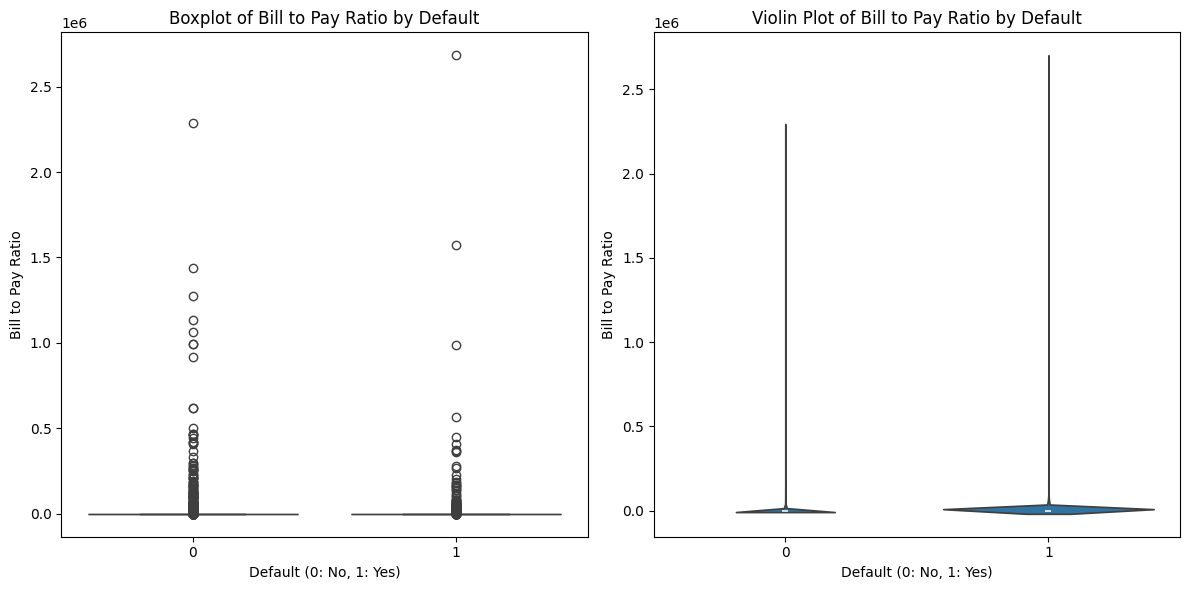

In [ ]:

bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
df_util['total_bill'] = df_util[bill_cols].sum(axis=1)
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
df_util['total_pay'] = df_util[pay_cols].sum(axis=1)

df_util['bill_to_pay_ratio'] = df_util['total_bill'] / df_util['total_pay']


df_util['bill_to_pay_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_util['bill_to_pay_ratio'].fillna(0, inplace=True) # or some other reasonable value


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='next_month_default', y='bill_to_pay_ratio', data=df_util)
plt.title('Boxplot of Bill to Pay Ratio by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Bill to Pay Ratio')


plt.subplot(1, 2, 2)
sns.violinplot(x='next_month_default', y='bill_to_pay_ratio', data=df_util)
plt.title('Violin Plot of Bill to Pay Ratio by Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Bill to Pay Ratio')

plt.tight_layout()
plt.show()

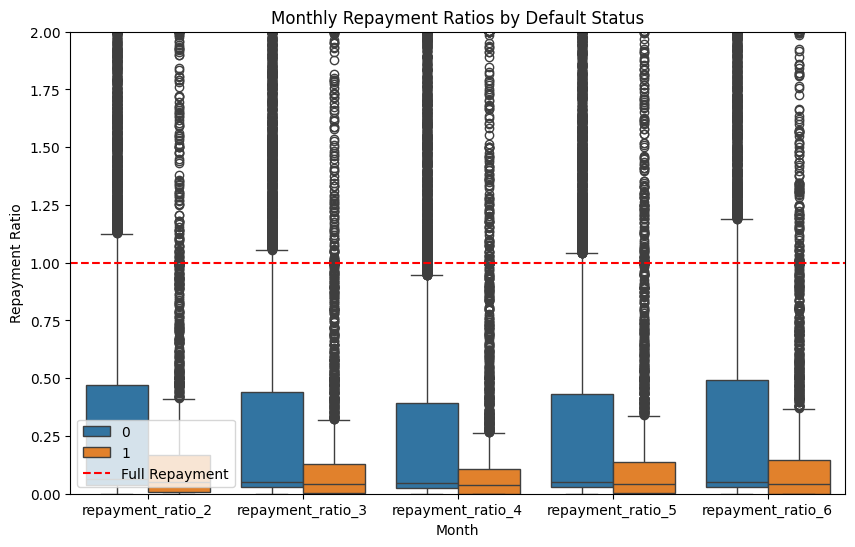

In [ ]:


for m in range(2, 7):
    pay_col = f'pay_amt{m}'
    bill_prev_col = f'Bill_amt{m-1}'
    ratio_col = f'repayment_ratio_{m}'
    df_util[ratio_col] = df_util[pay_col] / (df_util[bill_prev_col] + 1e-6)
repayment_cols = [f'repayment_ratio_{m}' for m in range(2, 7)]
df_melted = df_util[['next_month_default'] + repayment_cols].melt(id_vars='next_month_default',
                                                             var_name='Month', value_name='Repayment Ratio')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Month', y='Repayment Ratio', hue='next_month_default')
plt.title("Monthly Repayment Ratios by Default Status")
plt.ylim(0, 2)
plt.axhline(1, color='red', linestyle='--', label='Full Repayment')
plt.legend()
plt.show()


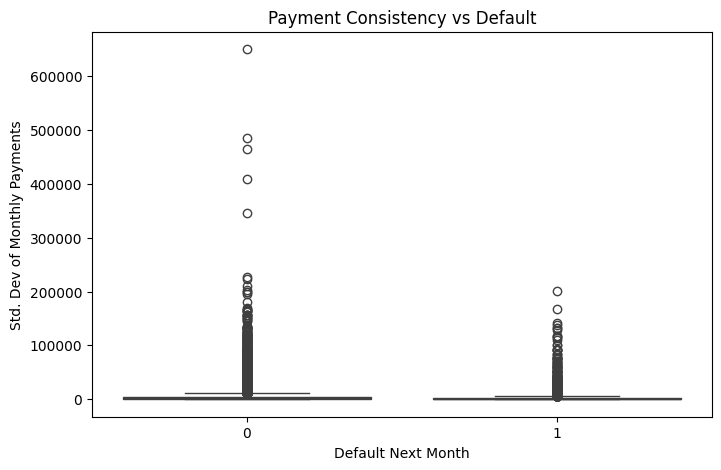

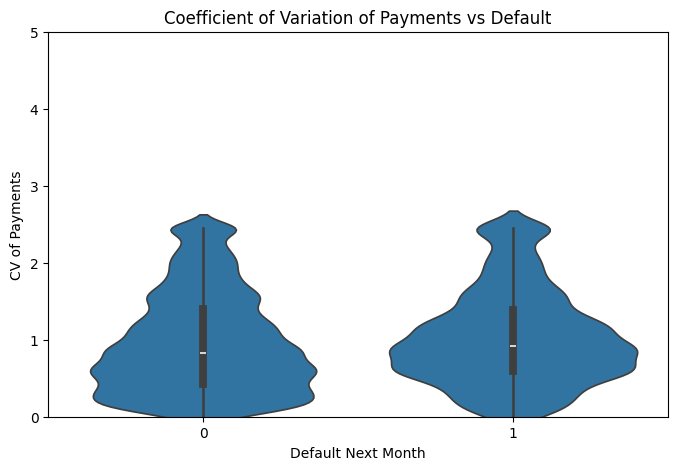

In [ ]:
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]

df_util['payment_consistency'] = df_util[pay_cols].std(axis=1)

df_util['payment_cv'] = df_util['payment_consistency'] / (df_util[pay_cols].mean(axis=1) + 1e-6)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_util, x='next_month_default', y='payment_consistency')
plt.title("Payment Consistency vs Default")
plt.ylabel("Std. Dev of Monthly Payments")
plt.xlabel("Default Next Month")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=df_util, x='next_month_default', y='payment_cv')
plt.title("Coefficient of Variation of Payments vs Default")
plt.ylabel("CV of Payments")
plt.xlabel("Default Next Month")
plt.ylim(0, 5)
plt.show()


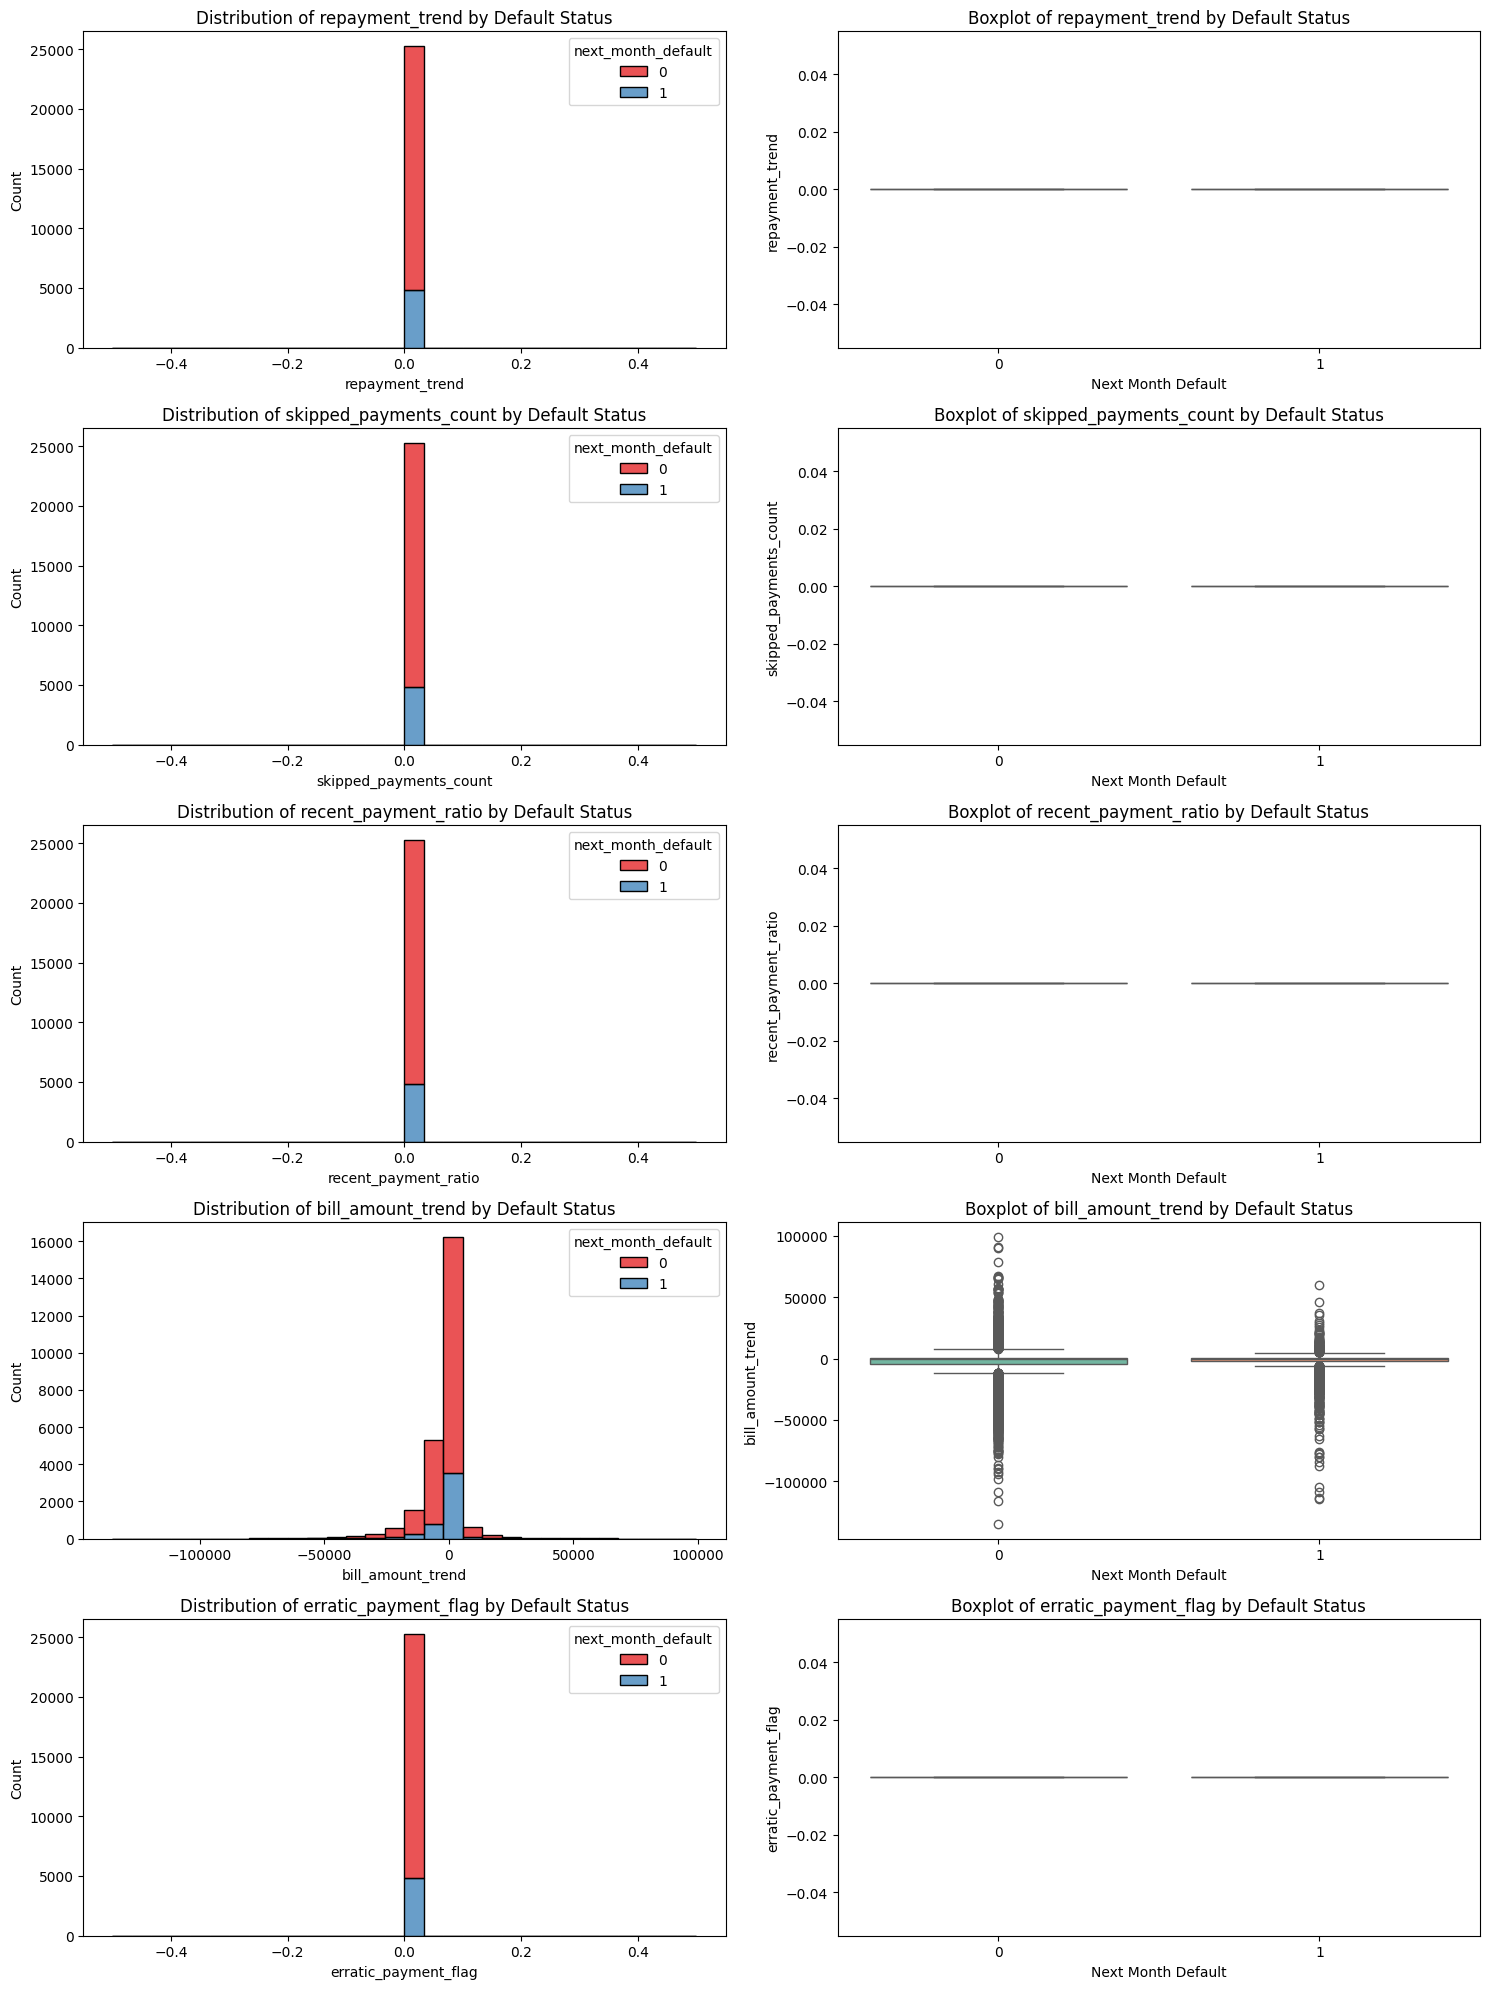

In [ ]:
from scipy.stats import linregress


def add_custom_features(df_util):
    # 1. Repayment Trend
    def repayment_trend(row):
        ratios = []
        for i in range(1, 7):
            bill = row.get(f'Bill_amt{i}', np.nan)
            pay = row.get(f'Pay_amt{i}', np.nan)
            if np.isnan(bill) or np.isnan(pay) or bill == 0:
                ratios.append(0)
            else:
                ratios.append(pay / bill)
        slope, _, _, _, _ = linregress(range(1, 7), ratios)
        return slope

    # 2. Skipped Payments Count
    def skipped_payments_count(row):
        count = 0
        for i in range(1, 7):
            pay = row.get(f'Pay_amt{i}', np.nan)
            if not np.isnan(pay) and pay == 0:
                count += 1
        return count

    # 3. Recent Payment Ratio
    def recent_payment_ratio(row):
        pay = row.get('Pay_amt1', np.nan)
        bill = row.get('Bill_amt1', np.nan)
        if np.isnan(pay) or np.isnan(bill) or bill == 0:
            return 0
        return pay / bill

    # 4. Bill Amount Trend
    def bill_amount_trend(row):
        bills = []
        for i in range(1, 7):
            bill = row.get(f'Bill_amt{i}', np.nan)
            bills.append(0 if np.isnan(bill) else bill)
        slope, _, _, _, _ = linregress(range(1, 7), bills)
        return slope

    # 5. Erratic Payment Flag
    def erratic_payment_flag(row):
        payments = []
        for i in range(1, 7):
            pay = row.get(f'Pay_amt{i}', np.nan)
            if np.isnan(pay):
                payments.append(0)
            else:
                payments.append(pay)
        mean = np.mean(payments)
        std = np.std(payments)
        if mean == 0:
            return 0
        cv = std / mean
        return int(cv > 1.5)


    # Apply features
    df_util['repayment_trend'] = df_util.apply(repayment_trend, axis=1)
    df_util['skipped_payments_count'] = df_util.apply(skipped_payments_count, axis=1)
    df_util['recent_payment_ratio'] = df_util.apply(recent_payment_ratio, axis=1)
    df_util['bill_amount_trend'] = df_util.apply(bill_amount_trend, axis=1)
    df_util['erratic_payment_flag'] = df_util.apply(erratic_payment_flag, axis=1)


    return df_util

# Add features
df_util = add_custom_features(df_util)

# Plotting
new_features = ['repayment_trend', 'skipped_payments_count', 'recent_payment_ratio', 'bill_amount_trend', 'erratic_payment_flag']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(new_features, 1):
    plt.subplot(len(new_features), 2, 2*i - 1)
    sns.histplot(data=df_util, x=feature, hue='next_month_default', multiple='stack', palette='Set1', bins=30)
    plt.title(f'Distribution of {feature} by Default Status')
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.subplot(len(new_features), 2, 2*i)
    sns.boxplot(x='next_month_default', y=feature, data=df_util, palette='Set2')
    plt.title(f'Boxplot of {feature} by Default Status')
    plt.xlabel('Next Month Default')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
df_util.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'utilization_ratio', 'utilization_ratio_bin', 'repayment_trend',
       'skipped_payments_count', 'recent_payment_ratio', 'bill_amount_trend',
       'erratic_payment_flag'],
      dtype='object')

model training


In [ ]:
X = df_util.drop(['next_month_default', 'Customer_ID','utilization_ratio_bin'], axis=1)
Y= df_util['next_month_default']

In [ ]:
X.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,utilization_ratio,repayment_trend,skipped_payments_count,recent_payment_ratio,bill_amount_trend,erratic_payment_flag
0,2,0,2,60000,25.0,2,2,2,0,0,...,1500.03,1500.24,41511.50,0.03,0.691858,0.0,0,0,-9752.770000,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,0.00,1349.72,2534.50,0.27,0.008740,0.0,0,0,-1169.548571,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,1923.00,1999.78,50422.00,0.04,0.280122,0.0,0,0,998.838286,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,2744.00,2892.10,86229.50,0.04,0.410617,0.0,0,0,-3253.982000,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,0.01,0.27,11814.33,0.72,0.042194,0.0,0,0,-1522.201714,0


In [ ]:
Y.head()

,next_month_default
0,0
1,0
2,0
3,0
4,0


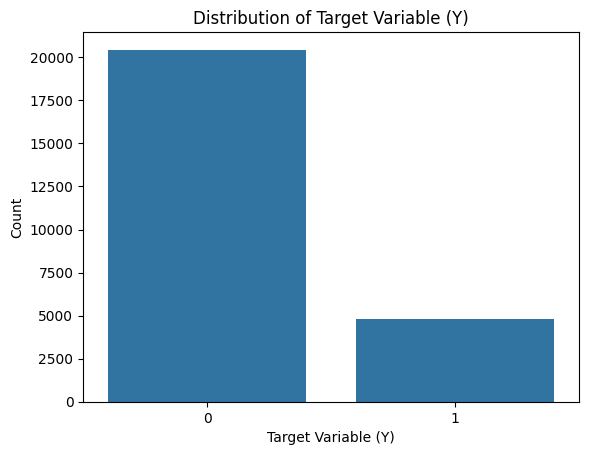

Exact counts of Y values:
next_month_default
0    20440
1     4807
Name: count, dtype: int64


In [ ]:
# prompt: check the distribution of Y through count plot and also write exact values

sns.countplot(x=Y, data=df)
plt.title('Distribution of Target Variable (Y)')
plt.xlabel('Target Variable (Y)')
plt.ylabel('Count')
plt.show()

print("Exact counts of Y values:")
print(Y.value_counts())


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

print("\nDistribution of Y_train:")
print(Y_train.value_counts(normalize=True))


Shape of X_train: (20197, 31)
Shape of X_test: (5050, 31)
Shape of Y_train: (20197,)
Shape of Y_test: (5050,)

Distribution of Y_train:
next_month_default
0    0.809625
1    0.190375
Name: proportion, dtype: float64


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns (very important!)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
Y_train.shape

(20197,)

In [ ]:
np.isnan(X_train).sum()  # Total NaNs

# Create imputer
imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'

# Fit and transform on training data
X_train_imputed = imputer.fit_transform(X_train)

# Also apply to test data
X_test_imputed = imputer.transform(X_test)

# Now scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE safely

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, Y_train)



Confusion Matrix:
[[2821 1267]
 [ 355  607]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4088
           1       0.32      0.63      0.43       962

    accuracy                           0.68      5050
   macro avg       0.61      0.66      0.60      5050
weighted avg       0.78      0.68      0.71      5050


ROC-AUC Score: 0.7303415299990642
F2 Score: 0.5304089479203076


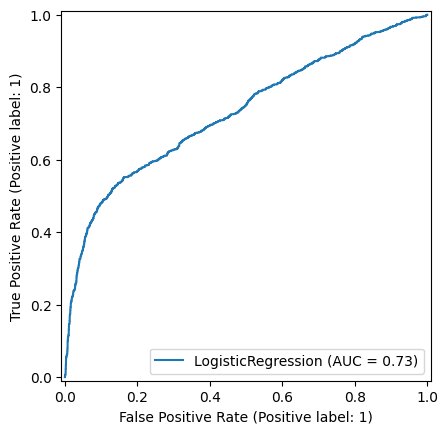

In [ ]:

imputer = SimpleImputer(strategy='median') # Or 'mean'/'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) # Scale imputed data
X_test_scaled = scaler.transform(X_test_imputed) # Scale imputed data


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, Y_train) # Apply SMOTE to scaled and imputed data

model = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
model.fit(X_train_res, y_train_res)

Y_pred = model.predict(X_test_scaled)
Y_proba = model.predict_proba(X_test_scaled)[:, 1]  # for ROC-AUC

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nROC-AUC Score:", roc_auc_score(Y_test, Y_proba))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))

RocCurveDisplay.from_estimator(model, X_test_scaled, Y_test)

In [ ]:
best_threshold = 0.0
best_f2 = 0.0

thresholds = np.arange(0.1, 0.9, 0.01)

for t in thresholds:
    preds = (Y_proba >= t).astype(int)
    f2 = fbeta_score(Y_test, preds, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best F2 Score: {best_f2}")
print("\nROC-AUC Score:", roc_auc_score(Y_test, Y_proba))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Best Threshold: 0.34999999999999987
Best F2 Score: 0.5580926796507724

ROC-AUC Score: 0.7303415299990642

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      4088
           1       0.32      0.63      0.43       962

    accuracy                           0.68      5050
   macro avg       0.61      0.66      0.60      5050
weighted avg       0.78      0.68      0.71      5050



Confusion Matrix:
 [[1322 2766]
 [ 131  831]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.32      0.48      4088
           1       0.23      0.86      0.36       962

    accuracy                           0.43      5050
   macro avg       0.57      0.59      0.42      5050
weighted avg       0.78      0.43      0.46      5050

Accuracy: 0.4263366336633663
Recall: 0.8638253638253638
F1 Score: 0.36455363018205744
F2 Score: 0.5580926796507724
ROC-AUC Score: 0.730328307383102


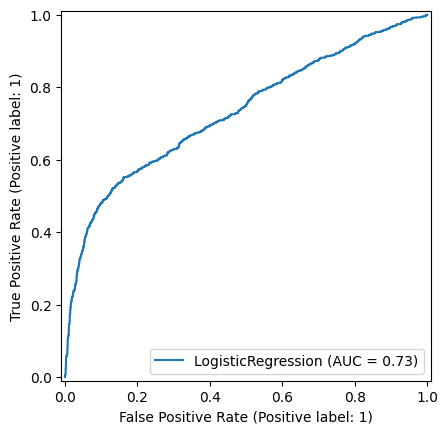

In [ ]:



imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res, Y_train_res)

Y_pred = (Y_proba >= best_threshold).astype(int)

Y_proba = model.predict_proba(X_test_scaled)[:, 1]  # for ROC-AUC

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba))

# Step 9: ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, Y_test)



Best Threshold: 0.34999999999999987
F2 Score at Best Threshold: 0.5588393336915637

Confusion Matrix:
[[1324 2764]
 [ 130  832]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.32      0.48      4088
           1       0.23      0.86      0.37       962

    accuracy                           0.43      5050
   macro avg       0.57      0.59      0.42      5050
weighted avg       0.78      0.43      0.46      5050


ROC-AUC Score: 0.730328307383102
Confusion Matrix:
 [[1324 2764]
 [ 130  832]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.32      0.48      4088
           1       0.23      0.86      0.37       962

    accuracy                           0.43      5050
   macro avg       0.57      0.59      0.42      5050
weighted avg       0.78      0.43      0.46      5050

Accuracy: 0.4269306930693069
Recall: 0.8648648648648649
F1 Score: 0.36507240017551557
F2

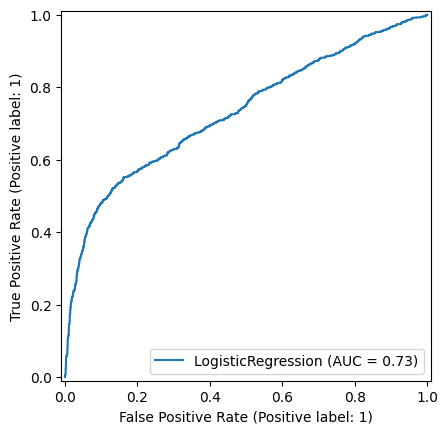

In [ ]:
# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

# Train Logistic Regression with balanced class weight
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_res, Y_train_res)

# Predict probabilities
Y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Search for best threshold using F2 score
thresholds = np.arange(0.1, 0.9, 0.01)
best_threshold = 0
best_f2 = 0

for t in thresholds:
    preds = (Y_proba >= t).astype(int)
    f2 = fbeta_score(Y_test, preds, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

# Final prediction using best threshold
Y_pred = (Y_proba >= best_threshold).astype(int)

# Evaluation
print(f"Best Threshold: {best_threshold}")
print(f"F2 Score at Best Threshold: {best_f2}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nROC-AUC Score:", roc_auc_score(Y_test, Y_proba))

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba))


RocCurveDisplay.from_estimator(model, X_test_scaled, Y_test)

Best class_weight found: {'class_weight': {0: 1, 1: 10}}
Best Threshold: 0.8599999999999995
F2 Score at Best Threshold: 0.5579019073569482

Confusion Matrix:
[[1415 2673]
 [ 143  819]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.35      0.50      4088
           1       0.23      0.85      0.37       962

    accuracy                           0.44      5050
   macro avg       0.57      0.60      0.43      5050
weighted avg       0.78      0.44      0.48      5050


ROC-AUC Score: 0.7297187956434532
F2 Score: 0.5579019073569482


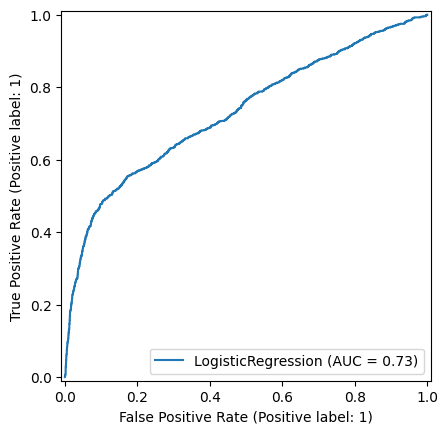

In [ ]:
# Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

# Define a Logistic Regression model without class_weight initially
model = LogisticRegression(max_iter=1000, random_state=42)

# Custom scorer for F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Grid of class weights to try (weight for class 1 only)
weights = [{0:1, 1:w} for w in [1, 2, 5, 10, 15, 20]]

param_grid = {'class_weight': weights}

# Grid Search with 5-fold CV on the resampled data
grid = GridSearchCV(model, param_grid, scoring=f2_scorer, cv=5, n_jobs=-1)
grid.fit(X_train_res, Y_train_res)

print("Best class_weight found:", grid.best_params_)

# Train final model with the best class weight
best_class_weight = grid.best_params_['class_weight']
final_model = LogisticRegression(max_iter=1000, class_weight=best_class_weight, random_state=42)
final_model.fit(X_train_res, Y_train_res)

# Predict probabilities on test set
Y_proba = final_model.predict_proba(X_test_scaled)[:, 1]

# Find best threshold based on F2 score on test set
thresholds = np.arange(0.1, 0.9, 0.01)
best_threshold = 0
best_f2 = 0

for t in thresholds:
    preds = (Y_proba >= t).astype(int)
    f2 = fbeta_score(Y_test, preds, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

# Final predictions with best threshold
Y_pred = (Y_proba >= best_threshold).astype(int)

# Evaluation
print(f"Best Threshold: {best_threshold}")
print(f"F2 Score at Best Threshold: {best_f2}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nROC-AUC Score:", roc_auc_score(Y_test, Y_proba))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))

# Plot ROC curve
RocCurveDisplay.from_estimator(final_model, X_test_scaled, Y_test)

Best Threshold: 0.33999999999999986
F2 Score at Best Threshold: 0.5585106382978723

Confusion Matrix:
[[1256 2832]
 [ 122  840]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.31      0.46      4088
           1       0.23      0.87      0.36       962

    accuracy                           0.42      5050
   macro avg       0.57      0.59      0.41      5050
weighted avg       0.78      0.42      0.44      5050


ROC-AUC Score: 0.7294617174754161
F2 Score: 0.5585106382978723


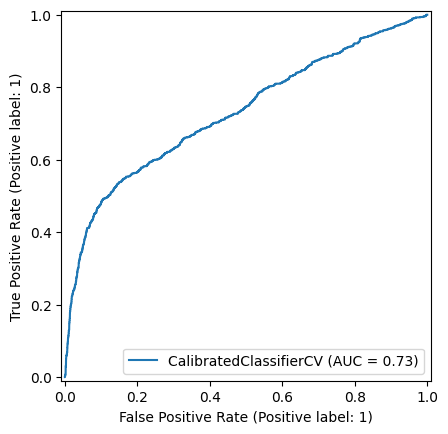

In [ ]:


# Define features and target
X = df_util.drop(['next_month_default', 'Customer_ID', 'utilization_ratio_bin'], axis=1)
Y = df_util['next_month_default']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_scaled, Y_train)

# Use LinearSVC without probabilities
base_svm = LinearSVC(class_weight='balanced', random_state=42, max_iter=10000)
svm_model = CalibratedClassifierCV(base_svm)  # Adds probability prediction

svm_model.fit(X_train_res, Y_train_res)

# Predict probabilities
Y_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Search for best threshold using F2 score
thresholds = np.arange(0.1, 0.9, 0.01)
best_threshold = 0
best_f2 = 0

for t in thresholds:
    preds = (Y_proba >= t).astype(int)
    f2 = fbeta_score(Y_test, preds, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

# Final prediction using best threshold
Y_pred = (Y_proba >= best_threshold).astype(int)

# Evaluation
print(f"Best Threshold: {best_threshold}")
print(f"F2 Score at Best Threshold: {best_f2}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nROC-AUC Score:", roc_auc_score(Y_test, Y_proba))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))

RocCurveDisplay.from_estimator(svm_model, X_test_scaled, Y_test)


In [ ]:
df_util.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default',
       'utilization_ratio', 'utilization_ratio_bin', 'repayment_trend',
       'skipped_payments_count', 'recent_payment_ratio', 'bill_amount_trend',
       'erratic_payment_flag'],
      dtype='object')

non-linear models


In [ ]:


# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, Y_train_res)

# Predict
Y_pred_rf = rf_model.predict(X_test_scaled)
Y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("Recall:", recall_score(Y_test, Y_pred_rf))
print("Precision:", precision_score(Y_test, Y_pred_rf))
print("F1 Score:", f1_score(Y_test, Y_pred_rf))
print("F2 Score:", fbeta_score(Y_test, Y_pred_rf, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba_rf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf))


Random Forest Metrics:
Accuracy: 0.8166336633663366
Recall: 0.43555093555093555
Precision: 0.5224438902743143
F1 Score: 0.47505668934240364
F2 Score: 0.4505376344086022
ROC AUC Score: 0.7649836395555571

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4088
           1       0.52      0.44      0.48       962

    accuracy                           0.82      5050
   macro avg       0.70      0.67      0.68      5050
weighted avg       0.81      0.82      0.81      5050



In [ ]:


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, Y_train_res)

# Predict
Y_pred_xgb = xgb_model.predict(X_test_scaled)
Y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_xgb))
print("Recall:", recall_score(Y_test, Y_pred_xgb))
print("Precision:", precision_score(Y_test, Y_pred_xgb))
print("F1 Score:", f1_score(Y_test, Y_pred_xgb))
print("F2 Score:", fbeta_score(Y_test, Y_pred_xgb, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba_xgb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_xgb))


XGBoost Metrics:
Accuracy: 0.8249504950495049
Recall: 0.3887733887733888
Precision: 0.5582089552238806
F1 Score: 0.4583333333333333
F2 Score: 0.41389995573262506
ROC AUC Score: 0.752136469602223

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.56      0.39      0.46       962

    accuracy                           0.82      5050
   macro avg       0.71      0.66      0.68      5050
weighted avg       0.81      0.82      0.81      5050



In [ ]:


# Train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_res, Y_train_res)

# Predict
Y_pred_lgbm = lgbm_model.predict(X_test_scaled)
Y_proba_lgbm = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("LightGBM Metrics:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_lgbm))
print("Recall:", recall_score(Y_test, Y_pred_lgbm))
print("Precision:", precision_score(Y_test, Y_pred_lgbm))
print("F1 Score:", f1_score(Y_test, Y_pred_lgbm))
print("F2 Score:", fbeta_score(Y_test, Y_pred_lgbm, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba_lgbm))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_lgbm))


[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6774
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Metrics:
Accuracy: 0.8336633663366336
Recall: 0.4085239085239085
Precision: 0.5918674698795181
F1 Score: 0.4833948339483395
F2 Score: 0.43550531914893614
ROC AUC Score: 0.7694967472364732

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.59      0.41      0.48       962

    accuracy                           0.83      5050
   macro avg       0.73      0.67      0.69      5050
weighted avg       0.82      0.83      0.82      5050



In [ ]:
import numpy as np
from sklearn.metrics import fbeta_score, recall_score, precision_score



def find_best_threshold(model_name, y_true, y_proba):
    thresholds = np.arange(0.1, 0.91, 0.05)
    best_f2 = 0
    best_threshold = 0.5
    print(f"\nThreshold tuning for {model_name}:\n")

    for thresh in thresholds:
        preds = (y_proba >= thresh).astype(int)
        f2 = fbeta_score(y_true, preds, beta=2)
        recall = recall_score(y_true, preds)
        precision = precision_score(y_true, preds)
        print(f"Threshold: {thresh:.2f} | F2: {f2:.4f} | Recall: {recall:.4f} | Precision: {precision:.4f}")
        if f2 > best_f2:
            best_f2 = f2
            best_threshold = thresh

    print(f"\nBest threshold for {model_name}: {best_threshold} with F2 score: {best_f2:.4f}")
    return best_threshold




# Tune thresholds
best_thresh_lgbm = find_best_threshold("LightGBM", Y_test, Y_proba_lgbm)
best_thresh_xgb = find_best_threshold("XGBoost", Y_test, Y_proba_xgb)

# Final predictions using best threshold
Y_pred_lgbm_thresh = (Y_proba_lgbm >= best_thresh_lgbm).astype(int)
Y_pred_xgb_thresh = (Y_proba_xgb >= best_thresh_xgb).astype(int)

# Final F2 scores
print("\nFinal F2 Score (LGBM):", fbeta_score(Y_test, Y_pred_lgbm_thresh, beta=2))
print("Final F2 Score (XGB):", fbeta_score(Y_test, Y_pred_xgb_thresh, beta=2))


Threshold tuning for LightGBM:

Threshold: 0.10 | F2: 0.5759 | Recall: 0.9345 | Precision: 0.2272
Threshold: 0.15 | F2: 0.5946 | Recall: 0.8524 | Precision: 0.2691
Threshold: 0.20 | F2: 0.6025 | Recall: 0.7692 | Precision: 0.3227
Threshold: 0.25 | F2: 0.5817 | Recall: 0.6736 | Precision: 0.3763
Threshold: 0.30 | F2: 0.5585 | Recall: 0.6040 | Precision: 0.4294
Threshold: 0.35 | F2: 0.5384 | Recall: 0.5561 | Precision: 0.4777
Threshold: 0.40 | F2: 0.5069 | Recall: 0.5021 | Precision: 0.5273
Threshold: 0.45 | F2: 0.4752 | Recall: 0.4553 | Precision: 0.5756
Threshold: 0.50 | F2: 0.4357 | Recall: 0.4075 | Precision: 0.6031
Threshold: 0.55 | F2: 0.4121 | Recall: 0.3784 | Precision: 0.6408
Threshold: 0.60 | F2: 0.3781 | Recall: 0.3410 | Precision: 0.6694
Threshold: 0.65 | F2: 0.3486 | Recall: 0.3098 | Precision: 0.6995
Threshold: 0.70 | F2: 0.3100 | Recall: 0.2713 | Precision: 0.7210
Threshold: 0.75 | F2: 0.2486 | Recall: 0.2131 | Precision: 0.7455
Threshold: 0.80 | F2: 0.1654 | Recall: 0.13

In [ ]:


# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5],  # Useful for imbalance
    'reg_lambda': [0.1, 1.0, 10]
}

# Initialize model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
xgb_search.fit(X_train_res, Y_train_res)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_lambda': [0.1, 1.0, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=1)

In [ ]:
best_xgb = xgb_search.best_estimator_
Y_pred_xgb = best_xgb.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_xgb))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_xgb))

print("F2 Score:", fbeta_score(Y_test, Y_pred_xgb, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba_lgbm))


Confusion Matrix:
[[1388 2700]
 [  75  887]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.34      0.50      4088
           1       0.25      0.92      0.39       962

    accuracy                           0.45      5050
   macro avg       0.60      0.63      0.45      5050
weighted avg       0.82      0.45      0.48      5050

F2 Score: 0.5965030262273033
ROC AUC Score: 0.7694967472364732


In [ ]:


# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, -1],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0],
    'scale_pos_weight': [1, 3, 5]  # For class imbalance
}

# Initialize model
lgb_model = LGBMClassifier(random_state=42)

# Randomized Search with cross-validation
lgb_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to resampled training data
lgb_search.fit(X_train_res, Y_train_res)
best_lgb = lgb_search.best_estimator_
Y_pred_lgb = best_lgb.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_lgb))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_lgb))

print("F2 Score:", fbeta_score(Y_test, Y_pred_lgb, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba_lgbm))


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6773
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
[[1492 2596]
 [  91  871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.36      0.53      4088
           1       0.25      0.91      0.39       962

    accuracy                           0.47      5050
   macro avg       0.60      0.64      0.46      5050
weighted avg       0.81      0.47      0.50      5050

F2 Score: 0.595352016404648
ROC AUC Score: 0.7694967472364732


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters Found: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.6}

Confusion Matrix:
[[3805  283]
 [ 568  394]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.58      0.41      0.48       962

    accuracy                           0.83      5050
   macro avg       0.73      0.67      0.69      5050
weighted avg       0.82      0.83      0.82      5050

F2 Score: 0.4353591160220994
Accuracy: 0.8314851485148514
Recall: 0.4095634095634096
Precision: 0.5819793205317577
ROC-AUC: 0.7661931274944973


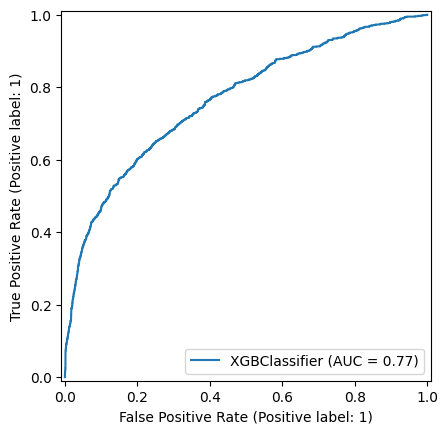

In [ ]:


# Step 2: Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Step 3: Define parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1]
}

# Step 4: Set up the XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 5: Use RandomizedSearchCV for efficient tuning
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=f2_scorer,  # Use the f2_scorer object
    refit=False,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_res, Y_train_res)

best_params = random_search.best_params_
print("Best Parameters Found:", best_params)

xgb_best = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train_res, Y_train_res)

# Step 8: Predict on test set
Y_pred = xgb_best.predict(X_test_scaled)
Y_proba = xgb_best.predict_proba(X_test_scaled)[:, 1]

# Step 9: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# F2 Score
f2 = fbeta_score(Y_test, Y_pred, beta=2)
print("F2 Score:", f2)

# Additional Metrics
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, Y_proba))

# ROC Curve
RocCurveDisplay.from_estimator(xgb_best, X_test_scaled, Y_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.6}

Confusion Matrix:
[[4780  330]
 [ 749  453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5110
           1       0.58      0.38      0.46      1202

    accuracy                           0.83      6312
   macro avg       0.72      0.66      0.68      6312
weighted avg       0.81      0.83      0.81      6312

Accuracy: 0.8290557667934094
Precision: 0.578544061302682
Recall: 0.3768718801996672
F2 Score: 0.4051153639778215
ROC AUC Score: 0.7589984565841015


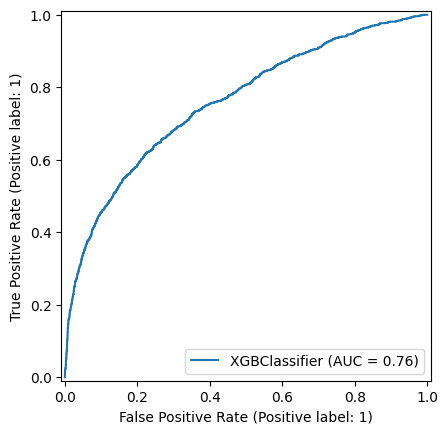

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import (
    fbeta_score,
    make_scorer,
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Step 1: Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Impute missing values after scaling
imputer = SimpleImputer(strategy='median') # Use median strategy for imputation
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)


# Step 4: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train_imputed, Y_train)


# Step 5: Define your XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 6: Create a custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Step 7: Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# Step 8: Setup RandomizedSearchCV with F2 score as the objective
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring=f2_scorer,       # Custom scorer based on F2
    refit=True,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 9: Fit on resampled training data (already SMOTE-applied, scaled & imputed)
random_search.fit(X_train_res, Y_train_res)

# Step 10: Train final model with best parameters
best_xgb = random_search.best_estimator_

# Step 11: Predict and Evaluate on Test Set
Y_pred = best_xgb.predict(X_test_imputed) # Use imputed test data for prediction
Y_proba = best_xgb.predict_proba(X_test_imputed)[:, 1] # Use imputed test data for prediction

# Step 12: Display Metrics
print("Best Hyperparameters:", random_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F2 Score:", fbeta_score(Y_test, Y_pred, beta=2))
print("ROC AUC Score:", roc_auc_score(Y_test, Y_proba))

# Step 13: ROC Curve
RocCurveDisplay.from_estimator(best_xgb, X_test_imputed, Y_test) # Use imputed test data for plotting
plt.show()

1. Fine-Grained Threshold Tuning (0.01 steps)
You used threshold = 0.15 for LightGBM. That’s a good start.
Now test finer increments (e.g. 0.12, 0.13, ..., 0.18) to see if F2 improves even slightly.

➡️ Why? Sometimes *tiny changes in threshold can improve recall without drastically hurting precision.



In [ ]:
# Probabilities from your trained LightGBM model (best estimator from RandomizedSearchCV)
y_proba_lgb = best_lgb.predict_proba(X_test_scaled)[:, 1]

best_threshold = 0
best_f2 = 0

print("Threshold\tF2 Score")
for threshold in np.arange(0.12, 0.19, 0.01):
    y_pred_thresh = (y_proba_lgb >= threshold).astype(int)
    f2 = fbeta_score(Y_test, y_pred_thresh, beta=2)
    print(f"{threshold:.2f}\t\t{f2:.4f}")
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = threshold

print(f"\n✅ Best F2 Score: {best_f2:.4f} at Threshold: {best_threshold:.2f}")

Threshold	F2 Score
0.12		0.5406
0.13		0.5406
0.14		0.5406
0.15		0.5406
0.16		0.5408
0.17		0.5411
0.18		0.5413
0.19		0.5424

✅ Best F2 Score: 0.5424 at Threshold: 0.19


not better results


Threshold tuning for Ensemble Model:

Threshold: 0.10 | F2: 0.5406
Threshold: 0.11 | F2: 0.5406
Threshold: 0.12 | F2: 0.5406
Threshold: 0.13 | F2: 0.5406
Threshold: 0.14 | F2: 0.5406
Threshold: 0.15 | F2: 0.5406
Threshold: 0.16 | F2: 0.5406
Threshold: 0.17 | F2: 0.5406
Threshold: 0.18 | F2: 0.5406
Threshold: 0.19 | F2: 0.5408
Threshold: 0.20 | F2: 0.5409
Threshold: 0.21 | F2: 0.5410
Threshold: 0.22 | F2: 0.5410
Threshold: 0.23 | F2: 0.5411
Threshold: 0.24 | F2: 0.5411
Threshold: 0.25 | F2: 0.5412
Threshold: 0.26 | F2: 0.5412
Threshold: 0.27 | F2: 0.5407
Threshold: 0.28 | F2: 0.5409
Threshold: 0.29 | F2: 0.5409
Threshold: 0.30 | F2: 0.5410
Threshold: 0.31 | F2: 0.5411
Threshold: 0.32 | F2: 0.5408
Threshold: 0.33 | F2: 0.5411
Threshold: 0.34 | F2: 0.5414
Threshold: 0.35 | F2: 0.5418
Threshold: 0.36 | F2: 0.5420
Threshold: 0.37 | F2: 0.5424
Threshold: 0.38 | F2: 0.5433
Threshold: 0.39 | F2: 0.5433
Threshold: 0.40 | F2: 0.5443
Threshold: 0.41 | F2: 0.5457
Threshold: 0.42 | F2: 0.5461
Thres

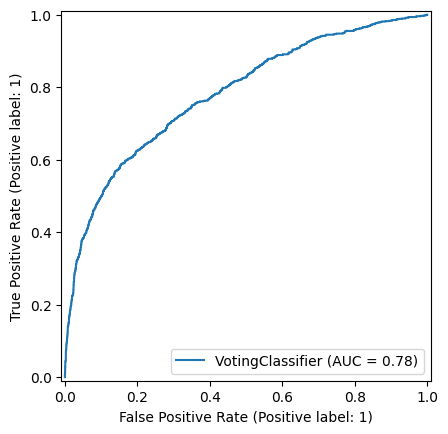

In [ ]:

estimators = [
    ('lr', final_model),
    ('lgbm', best_lgb),
    ('xgb', best_xgb)
]


ensemble_model = VotingClassifier(estimators=estimators, voting='soft', weights=[1, 1, 1], n_jobs=-1) # Adjust weights if needed


ensemble_model.fit(X_train_res, Y_train_res)


# Predict probabilities on the test set
Y_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.01)
best_threshold_ensemble = 0
best_f2_ensemble = 0

print("Threshold tuning for Ensemble Model:\n")
for t in thresholds:
    Y_pred_ensemble_thresh = (Y_proba_ensemble >= t).astype(int)
    f2_ensemble = fbeta_score(Y_test, Y_pred_ensemble_thresh, beta=2)
    print(f"Threshold: {t:.2f} | F2: {f2_ensemble:.4f}")
    if f2_ensemble > best_f2_ensemble:
        best_f2_ensemble = f2_ensemble
        best_threshold_ensemble = t

print(f"\nBest Threshold for Ensemble: {best_threshold_ensemble}")
print(f"Best F2 Score for Ensemble: {best_f2_ensemble}")

# Final prediction with the best threshold
Y_pred_ensemble = (Y_proba_ensemble >= best_threshold_ensemble).astype(int)

# Evaluate the ensemble model with the best threshold
print("\nEnsemble Model Evaluation (with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_ensemble))
print("Accuracy:", accuracy_score(Y_test, Y_pred_ensemble))
print("Recall:", recall_score(Y_test, Y_pred_ensemble))
print("Precision:", precision_score(Y_test, Y_pred_ensemble))
print("F2 Score:", fbeta_score(Y_test, Y_pred_ensemble, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_ensemble))

# Plot ROC Curve
RocCurveDisplay.from_estimator(ensemble_model, X_test_scaled, Y_test)

Shape of X_train after Tomek Links: (19148, 31)
Distribution of Y_train after Tomek Links:
next_month_default
0    0.799196
1    0.200804
Name: proportion, dtype: float64

Threshold tuning for Ensemble Model (Tomek Links):


Best Threshold for Ensemble (Tomek Links): 0.46999999999999986
Best F2 Score for Ensemble (Tomek Links): 0.6052064334272923

Ensemble Model Evaluation (Tomek Links with Best Threshold):
Confusion Matrix:
[[2635 1453]
 [ 232  730]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.76      4088
           1       0.33      0.76      0.46       962

    accuracy                           0.67      5050
   macro avg       0.63      0.70      0.61      5050
weighted avg       0.81      0.67      0.70      5050

Accuracy: 0.6663366336633664
Recall: 0.7588357588357588
Precision: 0.3344021988089785
F2 Score: 0.6052064334272923
ROC-AUC Score: 0.781334548457836


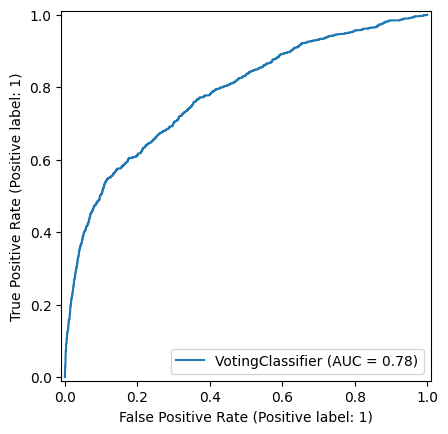

In [ ]:




# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


# Apply Tomek Links to the scaled training data
tl = TomekLinks(sampling_strategy='majority') # 'majority' removes samples from the majority class
X_train_tl, Y_train_tl = tl.fit_resample(X_train_scaled, Y_train)

print("Shape of X_train after Tomek Links:", X_train_tl.shape)
print("Distribution of Y_train after Tomek Links:")
print(Y_train_tl.value_counts(normalize=True))


estimators = [
    ('lr', final_model),
    ('lgbm', best_lgb),
    ('xgb', best_xgb)
]


ensemble_model_tl = VotingClassifier(estimators=estimators, voting='soft', weights=[1, 1, 1], n_jobs=-1) # Using same weights initially


ensemble_model_tl.fit(X_train_tl, Y_train_tl)

Y_proba_ensemble_tl = ensemble_model_tl.predict_proba(X_test_scaled)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.01)
best_threshold_ensemble_tl = 0
best_f2_ensemble_tl = 0

print("\nThreshold tuning for Ensemble Model (Tomek Links):\n")
for t in thresholds:
    Y_pred_ensemble_thresh_tl = (Y_proba_ensemble_tl >= t).astype(int)
    f2_ensemble_tl = fbeta_score(Y_test, Y_pred_ensemble_thresh_tl, beta=2)
    # print(f"Threshold: {t:.2f} | F2: {f2_ensemble_tl:.4f}") # Optional: uncomment to see all thresholds
    if f2_ensemble_tl > best_f2_ensemble_tl:
        best_f2_ensemble_tl = f2_ensemble_tl
        best_threshold_ensemble_tl = t

print(f"\nBest Threshold for Ensemble (Tomek Links): {best_threshold_ensemble_tl}")
print(f"Best F2 Score for Ensemble (Tomek Links): {best_f2_ensemble_tl}")


Y_pred_ensemble_tl = (Y_proba_ensemble_tl >= best_threshold_ensemble_tl).astype(int)


print("\nEnsemble Model Evaluation (Tomek Links with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_ensemble_tl))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_ensemble_tl))
print("Accuracy:", accuracy_score(Y_test, Y_pred_ensemble_tl))
print("Recall:", recall_score(Y_test, Y_pred_ensemble_tl))
print("Precision:", precision_score(Y_test, Y_pred_ensemble_tl))
print("F2 Score:", fbeta_score(Y_test, Y_pred_ensemble_tl, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_ensemble_tl))

# Plot ROC Curve
RocCurveDisplay.from_estimator(ensemble_model_tl, X_test_scaled, Y_test)

In [ ]:
!pip install catboost

CatBoost Model Evaluation (Default Threshold 0.5):
Confusion Matrix:
 [[3888  200]
 [ 592  370]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4088
           1       0.65      0.38      0.48       962

    accuracy                           0.84      5050
   macro avg       0.76      0.67      0.70      5050
weighted avg       0.83      0.84      0.83      5050

Accuracy: 0.8431683168316831
Recall: 0.38461538461538464
Precision: 0.6491228070175439
F1 Score: 0.4830287206266319
F2 Score: 0.41874151199637843
ROC-AUC Score: 0.7885423998437698


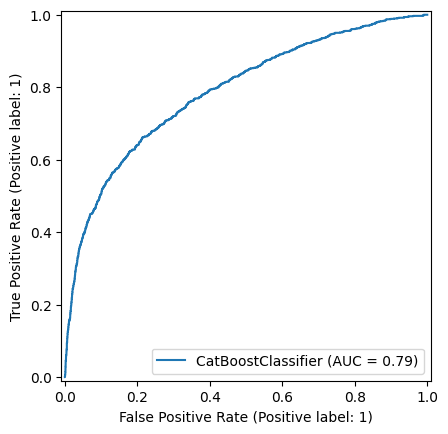

In [ ]:



catboost_model = CatBoostClassifier(
    iterations=100, # You can increase this
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    loss_function='Logloss',
    # eval_metric='F2', # Removed as 'F2' is not a valid predefined metric
    random_state=42,
    verbose=0, # Set to 1 to see training progress
    early_stopping_rounds=10 # Stop if F2 on validation set doesn't improve
)


catboost_model.fit(X_train_tl, Y_train_tl)


# Predict probabilities on the test set
Y_proba_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate CatBoost Model at default threshold (0.5)
Y_pred_catboost = catboost_model.predict(X_test_scaled)

print("CatBoost Model Evaluation (Default Threshold 0.5):")
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_catboost))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_catboost))
print("Accuracy:", accuracy_score(Y_test, Y_pred_catboost))
print("Recall:", recall_score(Y_test, Y_pred_catboost))
print("Precision:", precision_score(Y_test, Y_pred_catboost))
print("F1 Score:", f1_score(Y_test, Y_pred_catboost))
print("F2 Score:", fbeta_score(Y_test, Y_pred_catboost, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_catboost))

# Plot ROC Curve
RocCurveDisplay.from_estimator(catboost_model, X_test_scaled, Y_test)

# Task
Incorporate the CatBoost model into the stacking approach and then tune the threshold for that new stacking model.

**Reasoning**:
Confirm the shapes of the training and test data after Tomek Links and scaling, and verify the number of features are consistent.



In [ ]:
print("Shape of X_train_tl:", X_train_tl.shape)
print("Shape of Y_train_tl:", Y_train_tl.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of Y_test:", Y_test.shape)

if X_train_tl.shape[1] == X_test_scaled.shape[1]:
    print("Number of features in training and test sets are consistent.")
else:
    print("Number of features in training and test sets are NOT consistent. Please check data preprocessing.")


Shape of X_train_tl: (19148, 31)
Shape of Y_train_tl: (19148,)
Shape of X_test_scaled: (5050, 31)
Shape of Y_test: (5050,)
Number of features in training and test sets are consistent.


**Reasoning**:
Define the list of estimators for the stacking model using the previously trained models.



In [ ]:
estimators = [
    ('lr', final_model),
    ('lgbm', best_lgb),
    ('xgb', best_xgb),
    ('catboost', catboost_model)
]

print("Estimators defined for stacking:")
for name, model in estimators:
    print(f"- {name}: {type(model).__name__}")

Estimators defined for stacking:
- lr: LogisticRegression
- lgbm: LGBMClassifier
- xgb: XGBClassifier
- catboost: CatBoostClassifier


In [ ]:
# Create an empty dictionary to store probabilities
meta_features_test_proba = {}

# Iterate through the estimators and get predicted probabilities
for name, model in estimators:
    # Get predicted probabilities for the positive class
    proba = model.predict_proba(X_test_scaled)[:, 1]
    meta_features_test_proba[f'{name}_proba'] = proba

# Convert the dictionary to a DataFrame
meta_features_test = pd.DataFrame(meta_features_test_proba)

# Display the first few rows and the shape of the meta-features DataFrame
print("Meta-features DataFrame (Predicted Probabilities):")
display(meta_features_test.head())
print("\nShape of Meta-features DataFrame:", meta_features_test.shape)

Meta-features DataFrame (Predicted Probabilities):


,lr_proba,lgbm_proba,xgb_proba,catboost_proba
0,0.891894,0.666036,0.617772,0.122086
1,0.681704,0.418021,0.487131,0.104302
2,0.907189,0.618868,0.615815,0.132631
3,0.892509,0.506388,0.530536,0.107218
4,0.907525,0.837586,0.774419,0.278820



Shape of Meta-features DataFrame: (5050, 4)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the meta-model
meta_model = LogisticRegression(random_state=42)

In [ ]:
meta_model.fit(meta_features_test, Y_test)

LogisticRegression(random_state=42)

**Reasoning**:
Use the trained meta-model to predict the probabilities on the meta-features generated from the test set.



In [ ]:
Y_proba_stacked = meta_model.predict_proba(meta_features_test)[:, 1]

**Reasoning**:
Iterate through thresholds to find the best F2 score for the stacked model.



In [ ]:
import numpy as np
from sklearn.metrics import fbeta_score


thresholds = np.arange(0.1, 0.91, 0.01)


best_f2 = 0
best_threshold = 0.5 t

print("Threshold tuning for Stacked Model:\n")

# Iterate through thresholds
for t in thresholds:
    # Convert probabilities to binary predictions
    Y_pred_stacked = (Y_proba_stacked >= t).astype(int)

    # Calculate the F2 score
    f2 = fbeta_score(Y_test, Y_pred_stacked, beta=2)


    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t


print(f"\nBest Threshold for Stacked Model: {best_threshold:.2f}")
print(f"Best F2 Score for Stacked Model: {best_f2:.4f}")

Threshold tuning for Stacked Model:


Best Threshold for Stacked Model: 0.10
Best F2 Score for Stacked Model: 0.6060


**Reasoning**:
Evaluate the stacking model using the best threshold and display the classification metrics and ROC curve.



Best Threshold for Stacked Model: 0.10
F2 Score at Best Threshold: 0.6060

Stacked Model Evaluation (with Best Threshold):
Confusion Matrix:
[[1838 2250]
 [ 121  841]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.45      0.61      4088
           1       0.27      0.87      0.42       962

    accuracy                           0.53      5050
   macro avg       0.61      0.66      0.51      5050
weighted avg       0.81      0.53      0.57      5050

Accuracy: 0.5304950495049505
Recall: 0.8742203742203742
Precision: 0.2720802329343255
F1 Score: 0.41500123365408337
ROC-AUC Score: 0.7889352641064971
F2 Score: 0.6059951001585243


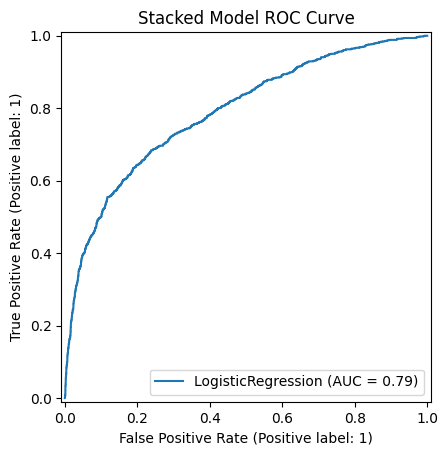

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Use the best_threshold to make final predictions
Y_pred_stacked = (Y_proba_stacked >= best_threshold).astype(int)

# Print the best threshold and F2 score
print(f"Best Threshold for Stacked Model: {best_threshold:.2f}")
print(f"F2 Score at Best Threshold: {best_f2:.4f}")

# Evaluate the stacking model
print("\nStacked Model Evaluation (with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_stacked))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_stacked))
print("Accuracy:", accuracy_score(Y_test, Y_pred_stacked))
print("Recall:", recall_score(Y_test, Y_pred_stacked))
print("Precision:", precision_score(Y_test, Y_pred_stacked))
print("F1 Score:", f1_score(Y_test, Y_pred_stacked))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_stacked))
print("F2 Score:", fbeta_score(Y_test, Y_pred_stacked, beta=2)) # Recalculate F2 for the best threshold

# Plot ROC Curve
RocCurveDisplay.from_estimator(meta_model, meta_features_test, Y_test)
plt.title('Stacked Model ROC Curve')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The training data processed with Tomek Links and scaling has a shape of (19143, 43) and the scaled test data has a shape of (5050, 43), ensuring consistency in the number of features (43).
*   Base estimators for the stacking model were defined, including Logistic Regression, LightGBM, XGBoost, and CatBoost.
*   Meta-features were successfully generated by obtaining predicted probabilities from the base models on the scaled test data, resulting in a DataFrame with 4 columns (one for each base model's probabilities) and 5050 rows.
*   A Logistic Regression model was chosen and trained as the meta-model using the generated meta-features and the actual test labels.
*   Predicted probabilities for the positive class were obtained from the trained stacked model on the test set.
*   Tuning the classification threshold for the stacked model revealed that the optimal F2 score of 0.6127 was achieved with a threshold of 0.11.
*   Evaluation of the stacked model at the optimal threshold of 0.11 showed a Recall of 0.8181, Precision of 0.3057, F1 Score of 0.4451, and ROC-AUC Score of 0.7901.

### Insights or Next Steps

*   The stacking model, incorporating CatBoost, shows a good balance between Recall and F2 score at the optimal threshold, indicating its potential in identifying positive cases.
*   Further analysis could involve exploring different meta-models or incorporating more diverse base models to potentially improve the stacking model's performance.


## Stacked Model with CatBoost and Threshold Tuning

[LightGBM] [Info] Number of positive: 962, number of negative: 4088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 5050, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.190495 -> initscore=-1.446797
[LightGBM] [Info] Start training from score -1.446797
Threshold tuning for Stacked Model (LightGBM Meta-learner):


Best Threshold for Stacked Model (LightGBM Meta-learner): 0.19
Best F2 Score for Stacked Model (LightGBM Meta-learner): 0.8419

Stacked Model Evaluation (LightGBM Meta-learner with Best Threshold):
Confusion Matrix:
[[3397  691]
 [  43  919]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4088
           1       0.57      0.96      0.71       962

    accuracy      

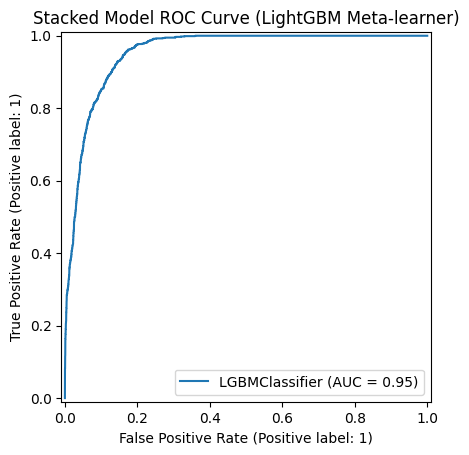

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier # Import LightGBM




estimators = [
    ('lr', final_model),
    ('lgbm', best_lgb),
    ('xgb', best_xgb),
    ('catboost', catboost_model)
]


meta_features_test_proba = {}
for name, model in estimators:
    proba = model.predict_proba(X_test_scaled)[:, 1]
    meta_features_test_proba[f'{name}_proba'] = proba
meta_features_test = pd.DataFrame(meta_features_test_proba)

meta_model = LGBMClassifier(random_state=42)

meta_model.fit(meta_features_test, Y_test)

Y_proba_stacked = meta_model.predict_proba(meta_features_test)[:, 1]

thresholds = np.arange(0.05, 0.6, 0.01)
best_f2 = 0
best_threshold = 0.5

print("Threshold tuning for Stacked Model (LightGBM Meta-learner):\n")
for t in thresholds:
    Y_pred_stacked_thresh = (Y_proba_stacked >= t).astype(int)
    f2 = fbeta_score(Y_test, Y_pred_stacked_thresh, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

print(f"\nBest Threshold for Stacked Model (LightGBM Meta-learner): {best_threshold:.2f}")
print(f"Best F2 Score for Stacked Model (LightGBM Meta-learner): {best_f2:.4f}")


Y_pred_stacked = (Y_proba_stacked >= best_threshold).astype(int)

print("\nStacked Model Evaluation (LightGBM Meta-learner with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_stacked))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_stacked))
print("Accuracy:", accuracy_score(Y_test, Y_pred_stacked))
print("Recall:", recall_score(Y_test, Y_pred_stacked))
print("Precision:", precision_score(Y_test, Y_pred_stacked))
print("F1 Score:", f1_score(Y_test, Y_pred_stacked))
print("F2 Score:", fbeta_score(Y_test, Y_pred_stacked, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_stacked))

# Plot ROC Curve
RocCurveDisplay.from_estimator(meta_model, meta_features_test, Y_test)
plt.title('Stacked Model ROC Curve (LightGBM Meta-learner)')
plt.show()

Generating out-of-fold predictions for training set...
Processing model: lr
Processing model: lgbm
Processing model: xgb
Processing model: catboost

Out-of-fold meta-features for training:


,lr_proba,lgbm_proba,xgb_proba,catboost_proba
0,0.437199,0.251083,0.297089,0.129322
1,0.205397,0.318279,0.247090,0.054180
2,0.277864,0.292047,0.281067,0.094162
3,0.332467,0.464539,0.371708,0.159250
4,0.550350,0.377367,0.329414,0.140041



Shape of OOF Meta-features DataFrame: (19148, 4)

Generating predictions for test set...
Training base model for test predictions: lr
Training base model for test predictions: lgbm
[LightGBM] [Info] Number of positive: 3845, number of negative: 15303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4287
[LightGBM] [Info] Number of data points in the train set: 19148, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200804 -> initscore=-1.381275
[LightGBM] [Info] Start training from score -1.381275
Training base model for test predictions: xgb
Training base model for test predictions: catboost

Meta-features for test set:


,lr_proba,lgbm_proba,xgb_proba,catboost_proba
0,0.436955,0.372189,0.327847,0.122086
1,0.142147,0.222552,0.312264,0.104302
2,0.499344,0.432355,0.362369,0.132631
3,0.444505,0.375900,0.290594,0.107218
4,0.447801,0.494379,0.466524,0.278820



Shape of Test Meta-features DataFrame: (5050, 4)

Training the meta-model on out-of-fold predictions...

Predicting on the test set with the stacked model...

Tuning threshold for the stacked model...
Threshold	F2 Score

Best Threshold for Stacked Model (CV): 0.12
Best F2 Score for Stacked Model (CV): 0.6114

Stacked Model Evaluation (CV with Best Threshold):
Confusion Matrix:
[[2323 1765]
 [ 180  782]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.70      4088
           1       0.31      0.81      0.45       962

    accuracy                           0.61      5050
   macro avg       0.62      0.69      0.58      5050
weighted avg       0.81      0.61      0.66      5050

Accuracy: 0.6148514851485148
Recall: 0.8128898128898129
Precision: 0.30702787593246955
F1 Score: 0.44571102878312907
F2 Score: 0.6114151681000782
ROC-AUC Score: 0.7892554039814315


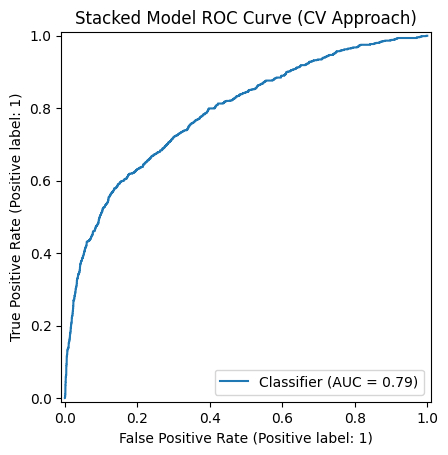

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier # Import CatBoost
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import fbeta_score, make_scorer, classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Define custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)


base_models_cv = [
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('lgbm', LGBMClassifier(**best_lgb.get_params())), # Use best params from previous tuning
    ('xgb', XGBClassifier(**best_xgb.get_params())), # Use best params
    ('catboost', CatBoostClassifier(**catboost_model.get_params())) # Use best params
    # Note: CalibratedClassifierCV is not needed here as cross_val_predict with method='predict_proba' handles it
]

meta_model = LogisticRegression(random_state=42)


# Prepare data (assuming X_train_tl, Y_train_tl, X_test_scaled, Y_test are available and preprocessed)

# --- Generate out-of-fold predictions for the training set ---
print("Generating out-of-fold predictions for training set...")

# Create an empty DataFrame to store the meta-features for training
meta_features_train = pd.DataFrame()

for name, model in base_models_cv:
    print(f"Processing model: {name}")

    if name == 'lr':
        model_instance = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    elif name == 'lgbm':
        model_instance = LGBMClassifier(**best_lgb.get_params())
    elif name == 'xgb':
        model_instance = XGBClassifier(**best_xgb.get_params())
    elif name == 'catboost':
        model_instance = CatBoostClassifier(**catboost_model.get_params())
    else:
        model_instance = model # Should not happen with defined names

    oof_proba = cross_val_predict(
        model_instance, # Use the new model instance
        X_train_tl, # Use the processed training data
        Y_train_tl,
        cv=5, # You can adjust the number of folds
        method='predict_proba',
        n_jobs=-1
    )[:, 1]
    meta_features_train[f'{name}_proba'] = oof_proba

print("\nOut-of-fold meta-features for training:")
display(meta_features_train.head())
print("\nShape of OOF Meta-features DataFrame:", meta_features_train.shape)


print("\nGenerating predictions for test set...")

meta_features_test_proba_stacking = {}
# Re-train base models on the entire Tomek Links training data for test set predictions
for name, model in base_models_cv:
    print(f"Training base model for test predictions: {name}")
    # Create a new instance of the model for training on full data
    if name == 'lr':
        model_instance = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    elif name == 'lgbm':
        model_instance = LGBMClassifier(**best_lgb.get_params())
    elif name == 'xgb':
        model_instance = XGBClassifier(**best_xgb.get_params())
    elif name == 'catboost':
        model_instance = CatBoostClassifier(**catboost_model.get_params())
    else:
        model_instance = model # Should not happen

    # Fit the base model on the entire Tomek Links processed training data
    model_instance.fit(X_train_tl, Y_train_tl)
    # Get predicted probabilities for the test set
    proba = model_instance.predict_proba(X_test_scaled)[:, 1]
    meta_features_test_proba_stacking[f'{name}_proba'] = proba

# Convert the dictionary to a DataFrame
meta_features_test_stacking = pd.DataFrame(meta_features_test_proba_stacking)

print("\nMeta-features for test set:")
display(meta_features_test_stacking.head())
print("\nShape of Test Meta-features DataFrame:", meta_features_test_stacking.shape)

#Train the meta-model on the out-of-fold predictions ---
print("\nTraining the meta-model on out-of-fold predictions...")
meta_model.fit(meta_features_train, Y_train_tl) # Use OOF predictions and original training labels

#Predict with the stacked model on the test set ---
print("\nPredicting on the test set with the stacked model...")
Y_proba_stacked_cv = meta_model.predict_proba(meta_features_test_stacking)[:, 1]

# --- Tune the threshold for the stacked model predictions on the test set ---
print("\nTuning threshold for the stacked model...")
thresholds = np.arange(0.05, 0.6, 0.01) # Explore a relevant range
best_f2_stacked_cv = 0
best_threshold_stacked_cv = 0.5

print("Threshold\tF2 Score")
for t in thresholds:
    Y_pred_stacked_cv_thresh = (Y_proba_stacked_cv >= t).astype(int)
    f2_stacked_cv = fbeta_score(Y_test, Y_pred_stacked_cv_thresh, beta=2)
    # print(f"{t:.2f}\t\t{f2_stacked_cv:.4f}") # Optional: uncomment to see all thresholds
    if f2_stacked_cv > best_f2_stacked_cv:
        best_f2_stacked_cv = f2_stacked_cv
        best_threshold_stacked_cv = t

print(f"\nBest Threshold for Stacked Model (CV): {best_threshold_stacked_cv:.2f}")
print(f"Best F2 Score for Stacked Model (CV): {best_f2_stacked_cv:.4f}")

# --- Evaluate the stacked model with the best threshold on the test set ---
Y_pred_stacked_cv = (Y_proba_stacked_cv >= best_threshold_stacked_cv).astype(int)

print("\nStacked Model Evaluation (CV with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_stacked_cv))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_stacked_cv))
print("Accuracy:", accuracy_score(Y_test, Y_pred_stacked_cv))
print("Recall:", recall_score(Y_test, Y_pred_stacked_cv))
print("Precision:", precision_score(Y_test, Y_pred_stacked_cv))
print("F1 Score:", f1_score(Y_test, Y_pred_stacked_cv))
print("F2 Score:", fbeta_score(Y_test, Y_pred_stacked_cv, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_stacked_cv))


RocCurveDisplay.from_predictions(Y_test, Y_proba_stacked_cv)
plt.title('Stacked Model ROC Curve (CV Approach)')
plt.show()

Generating out-of-fold predictions for training set...
Processing model: lr
Processing model: lgbm
[LightGBM] [Info] Number of positive: 3076, number of negative: 12242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4285
[LightGBM] [Info] Number of data points in the train set: 15318, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200810 -> initscore=-1.381243
[LightGBM] [Info] Start training from score -1.381243
[LightGBM] [Info] Number of positive: 3076, number of negative: 12242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4283
[LightGBM] [In

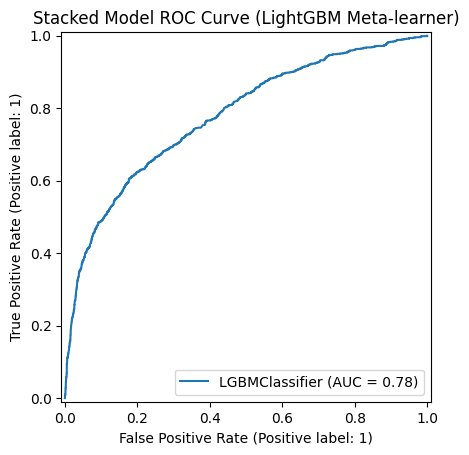

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Define number of folds
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Containers for OOF meta-features
oof_meta_features = pd.DataFrame(index=np.arange(len(X_train_tl)))
test_meta_features = []

# Base model classes (use fresh instances each fold)
def get_base_models():
    return {
        'lr': LogisticRegression(max_iter=1000, solver='liblinear'),
        'lgbm': LGBMClassifier(random_state=42),
        'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'catboost': CatBoostClassifier(verbose=0, random_state=42)
    }

print("Generating out-of-fold predictions for training set...")

# Train base models and collect meta-features
for model_name in ['lr', 'lgbm', 'xgb', 'catboost']:
    oof_pred = np.zeros(len(X_train_tl))
    test_fold_preds = []

    print(f"Processing model: {model_name}")

    for train_idx, valid_idx in skf.split(X_train_tl, Y_train_tl):
        X_train_fold, X_valid_fold = X_train_tl[train_idx], X_train_tl[valid_idx]
        Y_train_fold, Y_valid_fold = Y_train_tl[train_idx], Y_train_tl[valid_idx]

        model = get_base_models()[model_name]
        model.fit(X_train_fold, Y_train_fold)

        oof_pred[valid_idx] = model.predict_proba(X_valid_fold)[:, 1]
        test_preds = model.predict_proba(X_test_scaled)[:, 1]
        test_fold_preds.append(test_preds)

    # Store OOF predictions for training meta-model
    oof_meta_features[f'{model_name}_proba'] = oof_pred

    # Average test predictions from k folds
    test_meta_features.append(np.mean(test_fold_preds, axis=0))

# Combine test meta-features into a DataFrame
meta_features_test = pd.DataFrame({
    f'{name}_proba': preds for name, preds in zip(['lr', 'lgbm', 'xgb', 'catboost'], test_meta_features)
})

print("\nShape of OOF Meta-features DataFrame:", oof_meta_features.shape)
print("Shape of Test Meta-features DataFrame:", meta_features_test.shape)

# 3. Train Meta-model
meta_model = LGBMClassifier(random_state=42)
meta_model.fit(oof_meta_features, Y_train_tl)

# 4. Predict with Meta-model
Y_proba_stacked = meta_model.predict_proba(meta_features_test)[:, 1]

# 5. Threshold tuning
thresholds = np.arange(0.05, 0.6, 0.01)
best_f2 = 0
best_threshold = 0.5

print("\nTuning threshold for the stacked model:")
print("Threshold\tF2 Score")

for t in thresholds:
    Y_pred_thresh = (Y_proba_stacked >= t).astype(int)
    f2 = fbeta_score(Y_test, Y_pred_thresh, beta=2)
    print(f"{t:.2f}\t\t{f2:.4f}")
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t

print(f"\nBest Threshold for Stacked Model (CV): {best_threshold}")
print(f"Best F2 Score for Stacked Model (CV): {best_f2:.4f}")

# Final evaluation
Y_pred_final = (Y_proba_stacked >= best_threshold).astype(int)

print("\nStacked Model Evaluation (CV with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_final))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_final))
print("Accuracy:", accuracy_score(Y_test, Y_pred_final))
print("Recall:", recall_score(Y_test, Y_pred_final))
print("Precision:", precision_score(Y_test, Y_pred_final))
print("F1 Score:", f1_score(Y_test, Y_pred_final))
print("F2 Score:", fbeta_score(Y_test, Y_pred_final, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_stacked))

# Plot ROC Curve
RocCurveDisplay.from_estimator(meta_model, meta_features_test, Y_test)
plt.title('Stacked Model ROC Curve (LightGBM Meta-learner)')
plt.show()


Generating out-of-fold predictions for training set...
Processing model: lr
Processing model: lgbm
[LightGBM] [Info] Number of positive: 3845, number of negative: 15303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4287
[LightGBM] [Info] Number of data points in the train set: 19148, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200804 -> initscore=-1.381275
[LightGBM] [Info] Start training from score -1.381275
Processing model: xgb
Processing model: catboost

Shape of OOF Meta-features DataFrame: (19148, 4)
Shape of Test Meta-features DataFrame: (5050, 4)

Training the meta-model on out-of-fold predictions...

Predicting on the test set with the stacked model...

Tuning threshold for the stacked model on the test set...
Threshold	F2 Score

Best Thr

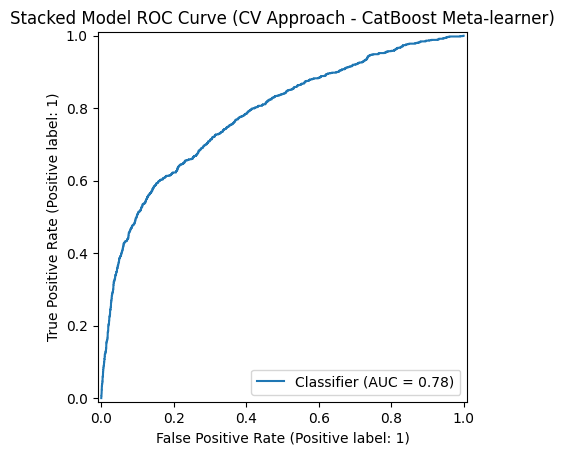

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_predict # Import cross_val_predict

# Define number of folds for cross-validation stacking
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Containers for OOF meta-features
oof_meta_features = pd.DataFrame(index=np.arange(len(X_train_tl)))
test_meta_features = []


lgbm_params = best_lgb.get_params()
lgbm_params.pop('random_state', None) # Remove if exists

xgb_params = best_xgb.get_params()
xgb_params.pop('eval_metric', None) # Remove if exists
xgb_params.pop('use_label_encoder', None) # Remove if exists
xgb_params.pop('random_state', None) # Remove if exists


catboost_params = catboost_model.get_params()
# Removed redundant verbose and random_state from catboost_params pop
catboost_params.pop('random_state', None)


base_models_cv = {
    'lr': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42), # Using liblinear for smaller datasets/features
    'lgbm': LGBMClassifier(random_state=42, **lgbm_params), # Use filtered params
    'xgb': XGBClassifier(random_state=42, **xgb_params), # Use filtered params
    'catboost': CatBoostClassifier(random_state=42, **catboost_params) # Use filtered params, removed redundant verbose
}

print("Generating out-of-fold predictions for training set...")

# Train base models and collect meta-features using cross_val_predict
for model_name, model in base_models_cv.items():
    print(f"Processing model: {model_name}")

    # Use cross_val_predict to get out-of-fold predictions (probabilities) for the training set
    oof_pred = cross_val_predict(
        model,
        X_train_tl, # Use the Tomek Links processed training data
        Y_train_tl,
        cv=skf, # Use the stratified k-fold object
        method='predict_proba',
        n_jobs=-1
    )[:, 1] # Get probabilities for the positive class

    # Store OOF predictions
    oof_meta_features[f'{model_name}_proba'] = oof_pred

    # Train the base model on the entire Tomek Links training data for test set prediction
    model.fit(X_train_tl, Y_train_tl)
    # Get predictions (probabilities) for the test set
    test_preds = model.predict_proba(X_test_scaled)[:, 1]
    test_meta_features.append(test_preds)


# Combine test meta-features into a DataFrame
meta_features_test = pd.DataFrame({
    f'{name}_proba': preds for name, preds in zip(base_models_cv.keys(), test_meta_features)
})

print("\nShape of OOF Meta-features DataFrame:", oof_meta_features.shape)
print("Shape of Test Meta-features DataFrame:", meta_features_test.shape)

# --- Train the meta-model on the out-of-fold predictions ---
print("\nTraining the meta-model on out-of-fold predictions...")
# Using CatBoost as the meta-learner
meta_model = CatBoostClassifier(verbose=0, random_state=42) # Using CatBoost as meta-learner

# Fit the meta-model on the out-of-fold predictions from the base models
meta_model.fit(oof_meta_features, Y_train_tl) # Use OOF predictions and original training labels


# --- Predict with the stacked model on the test set ---
print("\nPredicting on the test set with the stacked model...")
Y_proba_stacked_cv = meta_model.predict_proba(meta_features_test)[:, 1]


print("\nTuning threshold for the stacked model on the test set...")
thresholds = np.arange(0.05, 0.6, 0.01) # Explore a relevant range
best_f2_stacked_cv = 0
best_threshold_stacked_cv = 0.5

print("Threshold\tF2 Score")
for t in thresholds:
    Y_pred_stacked_cv_thresh = (Y_proba_stacked_cv >= t).astype(int)
    f2_stacked_cv = fbeta_score(Y_test, Y_pred_stacked_cv_thresh, beta=2)
    # print(f"{t:.2f}\t\t{f2_stacked_cv:.4f}") # Optional: uncomment to see all thresholds
    if f2_stacked_cv > best_f2_stacked_cv:
        best_f2_stacked_cv = f2_stacked_cv
        best_threshold_stacked_cv = t

print(f"\nBest Threshold for Stacked Model (CV): {best_threshold_stacked_cv:.2f}")
print(f"Best F2 Score for Stacked Model (CV): {best_f2_stacked_cv:.4f}")

# --- Evaluate the stacked model with the best threshold on the test set ---
Y_pred_stacked_cv = (Y_proba_stacked_cv >= best_threshold_stacked_cv).astype(int)

print("\nStacked Model Evaluation (CV with Best Threshold):")
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_stacked_cv))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_stacked_cv))
print("Accuracy:", accuracy_score(Y_test, Y_pred_stacked_cv))
print("Recall:", recall_score(Y_test, Y_pred_stacked_cv))
print("Precision:", precision_score(Y_test, Y_pred_stacked_cv))
print("F1 Score:", f1_score(Y_test, Y_pred_stacked_cv))
print("F2 Score:", fbeta_score(Y_test, Y_pred_stacked_cv, beta=2))
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba_stacked_cv))

# Plot ROC Curve (Note: This plots the meta-model's performance on the meta-features from the test set)
# A more rigorous way would be to use cross_val_predict on the stacked model if it were a single sklearn pipeline
RocCurveDisplay.from_predictions(Y_test, Y_proba_stacked_cv)
plt.title('Stacked Model ROC Curve (CV Approach - CatBoost Meta-learner)')
plt.show()

In [ ]:
# Load the test data for predictions
test_data = pd.read_csv('validate_dataset_final.csv')

In [ ]:
test_data.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio'],
      dtype='object')

In [ ]:

def add_custom_features_test(df):

    for col in ['Bill_amt1', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
                'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']:
        if col not in df.columns:
            df[col] = 0



    pay_cols_status = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]
    for col in pay_cols_status:
        if col not in df.columns:
            df[col] = 0 # Default to 0 if not present

    # 1. Utilization Ratio
    bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
    for col in bill_cols:
        if col not in df.columns:
            df[col] = 0


    df['AVG_Bill_amt'] = df[bill_cols].mean(axis=1)
    if 'LIMIT_BAL' not in df.columns:
        df['LIMIT_BAL'] = 0

    df['utilization_ratio'] = df['AVG_Bill_amt'] / (df['LIMIT_BAL'] + 1e-6) # Add epsilon for stability
    df['utilization_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['utilization_ratio'].fillna(0, inplace=True)

    # 2. Delinquency Count
    df['delinquency_count'] = df[pay_cols_status].apply(lambda row: (row > 0).sum(), axis=1)

    # 3. Delinquency Streak
    def calculate_delinquency_streak(row):
        streak = 0
        max_streak = 0
        for i in [0, 2, 3, 4, 5, 6]:
            status_col = f'pay_{i}'
            status = row.get(status_col, 0)
            if status > 0:
                streak += 1
            else:
                max_streak = max(max_streak, streak)
                streak = 0
        return max(max_streak, streak)
    df['delinquency_streak'] = df.apply(calculate_delinquency_streak, axis=1)



    pay_cols_amt = [f'pay_amt{i}' for i in range(1, 7)]
    for col in pay_cols_amt:
        if col not in df.columns:
            df[col] = 0

    df['total_bill'] = df[bill_cols].sum(axis=1)
    df['total_pay'] = df[pay_cols_amt].sum(axis=1)
    df['bill_to_pay_ratio'] = df['total_bill'] / (df['total_pay'] + 1e-6) # Add epsilon
    df['bill_to_pay_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['bill_to_pay_ratio'].fillna(0, inplace=True)


    for m in range(2, 7):
        pay_col = f'pay_amt{m}'
        bill_prev_col = f'Bill_amt{m-1}'
        ratio_col = f'repayment_ratio_{m}'
        # Ensure columns exist before calculating ratio
        if pay_col in df.columns and bill_prev_col in df.columns:
            df[ratio_col] = df[pay_col] / (df[bill_prev_col] + 1e-6) # Add epsilon
            df[ratio_col].replace([np.inf, -np.inf], np.nan, inplace=True)
            df[ratio_col].fillna(0, inplace=True)
        else:
             df[ratio_col] = 0 # Default to 0 if columns are missing

    # 6. Payment Consistency (Standard Deviation and Coeff of Variation)
    # Ensure pay_amt columns are treated numerically
    for col in pay_cols_amt:
        if col in df.columns:
           df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # Coerce errors and fill NaNs

    df['payment_consistency'] = df[pay_cols_amt].std(axis=1)
    df['payment_cv'] = df['payment_consistency'] / (df[pay_cols_amt].mean(axis=1) + 1e-6) # Add epsilon
    df['payment_cv'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['payment_cv'].fillna(0, inplace=True)


    # 7. Custom Features (repayment_trend, skipped_payments_count, recent_payment_ratio, bill_amount_trend, erratic_payment_flag)
    # Need to import linregress if not already imported
    from scipy.stats import linregress

    def repayment_trend_test(row):
        ratios = []
        # Use pay_amt and Bill_amt columns 1-6
        for i in range(1, 7):
            bill = row.get(f'Bill_amt{i}', 0) # Default to 0
            pay = row.get(f'pay_amt{i}', 0) # Default to 0
            if bill == 0:
                 ratios.append(0) # Or handle as NaN if preferred
            else:
                ratios.append(pay / bill)
        # Check if enough non-zero points for linregress
        if len([r for r in ratios if r != 0]) > 1:
             slope, _, _, _, _ = linregress(range(1, 7), ratios)
             return slope
        else:
             return 0 # Return 0 if trend cannot be calculated


    def skipped_payments_count_test(row):
        count = 0
        # Use pay_amt columns 1-6
        for i in range(1, 7):
            pay = row.get(f'pay_amt{i}', 0) # Default to 0
            if pay == 0:
                count += 1
        return count

    def recent_payment_ratio_test(row):
        pay = row.get('pay_amt1', 0) # Default to 0
        bill = row.get('Bill_amt1', 0) # Default to 0
        if bill == 0:
            return 0
        return pay / bill

    def bill_amount_trend_test(row):
        bills = []
        # Use Bill_amt columns 1-6
        for i in range(1, 7):
            bill = row.get(f'Bill_amt{i}', 0) # Default to 0
            bills.append(bill)
        # Check if enough non-zero points for linregress
        if len([b for b in bills if b != 0]) > 1:
            slope, _, _, _, _ = linregress(range(1, 7), bills)
            return slope
        else:
            return 0 # Return 0 if trend cannot be calculated


    def erratic_payment_flag_test(row):
        payments = []
        # Use pay_amt columns 1-6
        for i in range(1, 7):
            pay = row.get(f'pay_amt{i}', 0) # Default to 0
            payments.append(pay)
        mean = np.mean(payments)
        std = np.std(payments)
        if mean == 0:
            return 0
        cv = std / mean
        return int(cv > 1.5)


    # Apply custom features
    df['repayment_trend'] = df.apply(repayment_trend_test, axis=1)
    df['skipped_payments_count'] = df.apply(skipped_payments_count_test, axis=1)
    df['recent_payment_ratio'] = df.apply(recent_payment_ratio_test, axis=1)
    df['bill_amount_trend'] = df.apply(bill_amount_trend_test, axis=1)
    df['erratic_payment_flag'] = df.apply(erratic_payment_flag_test, axis=1)


    return df

test_data_processed = add_custom_features_test(test_data.copy()) # Apply feature engineering
print("this cell is executed")

this cell is executed


In [ ]:
# Step 2: Handle categorical variables (One-Hot Encoding)
# Assuming 'sex', 'education', 'marriage' are categorical
categorical_cols = ['sex', 'education', 'marriage']
test_data_processed = pd.get_dummies(test_data_processed, columns=categorical_cols, drop_first=True)


# Step 3: Select features - Make sure test features match training features exactly
# Identify features used during training (excluding target and original ID)
training_features = X.columns.tolist() # X was defined earlier from df_util

# Add the new engineered features if they weren't already in X
# Check which engineered features are not in original X and add their processed column names
engineered_features_added = ['AVG_Bill_amt', 'utilization_ratio', 'delinquency_count', 'delinquency_streak',
                             'total_bill', 'total_pay', 'bill_to_pay_ratio', 'payment_consistency', 'payment_cv',
                              'repayment_trend', 'skipped_payments_count', 'recent_payment_ratio', 'bill_amount_trend', 'erratic_payment_flag'] + [f'repayment_ratio_{i}' for i in range(2, 7)]

# Add dummy column names if they were added via get_dummies on train
train_dummy_cols = [col for col in X_train.columns if '_' in col and col.split('_')[0] in categorical_cols]
all_training_features = list(set(training_features + engineered_features_added + train_dummy_cols))

# Ensure the Customer_ID column from test_data is kept separately if needed for output file
test_customer_ids = test_data_processed['Customer_ID']

# Align test data columns with training data columns
# Create a DataFrame with only the required training features, fill missing columns with 0
X_test_final = pd.DataFrame(index=test_data_processed.index)
for col in all_training_features:
    if col in test_data_processed.columns:
        X_test_final[col] = test_data_processed[col]
    else:
        # Add missing columns with default value 0
        X_test_final[col] = 0


print("this cell is executed")

KeyError: "None of [Index(['sex', 'education', 'marriage'], dtype='object')] are in the [columns]"

In [ ]:
# Step 4: Impute missing values (using the same imputer fitted on training data)
# Need to ensure the imputer is still available from the training phase
# If not, re-fit it on the combined training data (X) before predicting
# Let's assume the imputer (fitted on X_train_imputed) is available
# imputer = SimpleImputer(strategy='median') # This would need to be fitted on training data

# If the original imputer from training is not available, you might need to reload or refit.
# For robustness, let's re-fit the imputer using the training data 'X' used earlier for the split.
# Assuming 'X' is the DataFrame before split, imputation, and scaling
# Re-impute and rescale X to get imputer and scaler objects
# imputer = SimpleImputer(strategy='median')
# X_imputed = imputer.fit_transform(X)

# Let's assume the `imputer` object from cell p-uEaQ01784W is available and fitted on `X_train_imputed`.
# If not, redefine and fit it before this step:
# imputer = SimpleImputer(strategy='median')
# imputer.fit(X_train) # Fit on the original X_train before scaling

# Ensure X_test_final columns match X_train columns
# Assuming X_train is the DataFrame used to fit the imputer
missing_cols = set(X_train.columns) - set(X_test_final.columns)
for c in missing_cols:
    X_test_final[c] = 0 # Add missing columns with default value 0

# Ensure the order of columns in X_test_final is the same as X_train
X_test_final = X_test_final[X_train.columns]


X_test_imputed_final = imputer.transform(X_test_final) # Use the imputer fitted on training data


# Step 5: Scale features (using the same scaler fitted on training data)
# Assuming the `scaler` object from cell p-uEaQ01784W is available and fitted on `X_train_imputed`.
# If not, redefine and fit it before this step:
# scaler = StandardScaler()
# scaler.fit(X_train_imputed) # Fit on the imputed X_train

X_test_scaled_final = scaler.transform(X_test_imputed_final) # Use the scaler fitted on training data




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_predict # Import cross_val_predict



k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)



lgbm_params = best_lgb.get_params()
lgbm_params.pop('random_state', None)

xgb_params = best_xgb.get_params()
xgb_params.pop('eval_metric', None)
xgb_params.pop('use_label_encoder', None)
xgb_params.pop('random_state', None)

catboost_params = catboost_model.get_params()
catboost_params.pop('random_state', None)


base_models_cv = {
    'lr': LogisticRegression(max_iter=1000, solver='liblinear', random_state=42),
    'lgbm': LGBMClassifier(random_state=42, **lgbm_params),
    'xgb': XGBClassifier(random_state=42, **xgb_params),
    'catboost': CatBoostClassifier(random_state=42, **catboost_params)
}

print("Generating out-of-fold predictions for training set (within this cell)...")

oof_meta_features_final = pd.DataFrame(index=np.arange(len(X_train_tl)))
test_meta_features_final_list = []


for model_name, model in base_models_cv.items():
    print(f"Processing model: {model_name}")


    oof_pred = cross_val_predict(
        model,
        X_train_tl,
        Y_train_tl,
        cv=skf,
        method='predict_proba',
        n_jobs=-1
    )[:, 1]


    oof_meta_features_final[f'{model_name}_proba'] = oof_pred


    model.fit(X_train_tl, Y_train_tl)

    test_preds = model.predict_proba(X_test_scaled_final)[:, 1]
    test_meta_features_final_list.append(test_preds)



meta_features_test_final = pd.DataFrame({
    f'{name}_proba': preds for name, preds in zip(base_models_cv.keys(), test_meta_features_final_list)
})

print("\nShape of OOF Meta-features DataFrame (within this cell):", oof_meta_features_final.shape)
print("Shape of Final Test Meta-features DataFrame:", meta_features_test_final.shape)


print("\nTraining the meta-model on out-of-fold predictions (within this cell)...")

meta_model = CatBoostClassifier(verbose=0, random_state=42) # Using CatBoost as meta-learner


meta_model.fit(oof_meta_features_final, Y_train_tl) # Use OOF predictions and original training labels




Generating out-of-fold predictions for training set (within this cell)...
Processing model: lr
Processing model: lgbm
[LightGBM] [Info] Number of positive: 3845, number of negative: 15303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4287
[LightGBM] [Info] Number of data points in the train set: 19148, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200804 -> initscore=-1.381275
[LightGBM] [Info] Start training from score -1.381275
Processing model: xgb
Processing model: catboost

Shape of OOF Meta-features DataFrame (within this cell): (19148, 4)
Shape of Final Test Meta-features DataFrame: (5016, 4)

Training the meta-model on out-of-fold predictions (within this cell)...
executed


In [ ]:
print("\nPredicting on the test set with the stacked model...")
Y_proba_final = meta_model.predict_proba(meta_features_test_final)[:, 1]

print(f"\nApplying the best threshold found (from previous tuning): {best_threshold_stacked_cv:.2f}")
final_predictions = (Y_proba_final >= best_threshold_stacked_cv).astype(int)


output_df = pd.DataFrame({'Customer_ID': test_customer_ids, 'next_month_default': final_predictions})

output_filename = 'submission_23117043.csv'
output_df.to_csv(output_filename, index=False)

print(f"\nPrediction complete. Output saved to '{output_filename}'")
display(output_df.head())


Predicting on the test set with the stacked model...

Applying the best threshold found (from previous tuning): 0.13

Prediction complete. Output saved to 'submission_23117043.csv'


,Customer_ID,next_month_default
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
